## Copying dataset to my own drive using shortcut

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
%cd /gdrive/MyDrive/additional info

[Errno 2] No such file or directory: '/gdrive/MyDrive/additional info'
/content


In [ ]:
!pwd

/gdrive/.shortcut-targets-by-id/1v55aqdaG8xqSPW7Qdnf5tYNDSOTUZyzS/additional info


In [ ]:
!!cp -r '/gdrive/.shortcut-targets-by-id/1v55aqdaG8xqSPW7Qdnf5tYNDSOTUZyzS/additional info/.' '/gdrive/My Drive/HPC'

[]

## Loading data

In [ ]:
!pip install scipy

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
%cd /gdrive/MyDrive/

/gdrive/MyDrive


In [5]:
!pwd

/gdrive/MyDrive


In [ ]:
!ls

'2025 conference DDL (NJIT XU Lab).gsheet'
'2 10.pptx'
 644milestone1.gdoc
'644 report.gdoc'
 732pre.gdoc
'Big Data Challenges and Solutions in super bowl.gdoc'
 cheche.gsheet
 code.gdoc
'Colab Notebooks'
 demo1.mp4
 Final_Fall2024.docx
 HPC
 Konpa_Night_Flyer_2.jpeg
'milestone 2 - Yiran Huang.gdoc'
'NJIT Template.gform'
'paper list.gdoc'
'pre seq2seq - Made with Clipchamp_1713758103167.mp4'
 README_data_static.rtf.gdoc
 result.gdoc
'Screen Shot 2024-06-10 at 1.10.01 AM.png'
 sub1_yeo100_ts4800_std.gsheet
 TA_01.csv
 text.csv
'Untitled document (1).gdoc'
'Untitled document.gdoc'
'Yiran pre 732.mp4'


In [ ]:
!pip install h5py

In [2]:
import scipy.io
import numpy as np
import h5py
mat_data = h5py.File("./HPC/hcp1003_RestALL_Schaefer_tcCLEAN.mat", "r")


In [4]:
print(mat_data.keys())
for key in mat_data:
    if not key.startswith("__"):  # Ignore system metadata keys
        print(f"Variable: {key}, Type: {type(mat_data[key])}, Shape: {mat_data[key].shape if isinstance(mat_data[key], np.ndarray) else 'N/A'}")


<KeysViewHDF5 ['#refs#', 'FCmats', 'badcomponents', 'tc_clean', 'tc_std']>
Variable: #refs#, Type: <class 'h5py._hl.group.Group'>, Shape: N/A
Variable: FCmats, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: badcomponents, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: tc_clean, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A
Variable: tc_std, Type: <class 'h5py._hl.dataset.Dataset'>, Shape: N/A


In [3]:
key_name = "FCmats"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
# print(mat_data[key_name][0])  # Print first 5 elements (if large)
FC_mats = mat_data[key_name]
print(FC_mats.shape)

<HDF5 dataset "FCmats": shape (92, 92, 4, 1001), type "<f8">
(92, 92, 4, 1001)


In [ ]:
key_name = "badcomponents"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
print(mat_data[key_name][:1])  # Print first 5 elements (if large)

<HDF5 dataset "badcomponents": shape (8, 1), type "<f8">
[[9.]]


In [4]:
key_name = "tc_clean"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
#print(mat_data[key_name][:1])  # Print first 5 elements (if large)

# Select the variable
tc_clean = mat_data[key_name]

# Check shape and type
print(f"Shape: {tc_clean.shape}, Type: {tc_clean.dtype}")

# Check the first reference
first_ref = tc_clean[0, 0]  # Access first HDF5 object reference
print("First reference type:", type(first_ref))

# If it's an object reference, get its name in the HDF5 file
if isinstance(first_ref, h5py.Reference):
    obj = mat_data[first_ref]  # Dereference
    print("Dereferenced object type:", type(obj))
    print("Shape of the object:", obj.shape)
    # print("First few values:", obj[:5])  # Print actual data

num_sessions, num_subjects =  tc_clean.shape
ts_data = [[np.array(mat_data[ref]) for ref in tc_clean[i]] for i in range(num_sessions)]
ts_data = np.transpose(ts_data, (1, 0, 2, 3)) # --> [subjects, sessions, regions, timepoints]
print("Shape of the ts_data:", np.array(ts_data).shape)

<HDF5 dataset "tc_clean": shape (4, 1003), type "|O">
Shape: (4, 1003), Type: object
First reference type: <class 'h5py.h5r.Reference'>
Dereferenced object type: <class 'h5py._hl.dataset.Dataset'>
Shape of the object: (92, 1200)
Shape of the ts_data: (1003, 4, 92, 1200)


In [ ]:
key_name = "tc_std"  # Replace with actual variable name
print(mat_data[key_name])  # Print entire variable (if small)
print(mat_data[key_name][:1])  # Print first 5 elements (if large)

<HDF5 dataset "tc_std": shape (4, 1003), type "|O">
[[<HDF5 object reference> <HDF5 object reference> <HDF5 object reference>
  ... <HDF5 object reference> <HDF5 object reference>
  <HDF5 object reference>]]


# Visualization

## FC matrix for each subject with 4 sessions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import h5py
import os

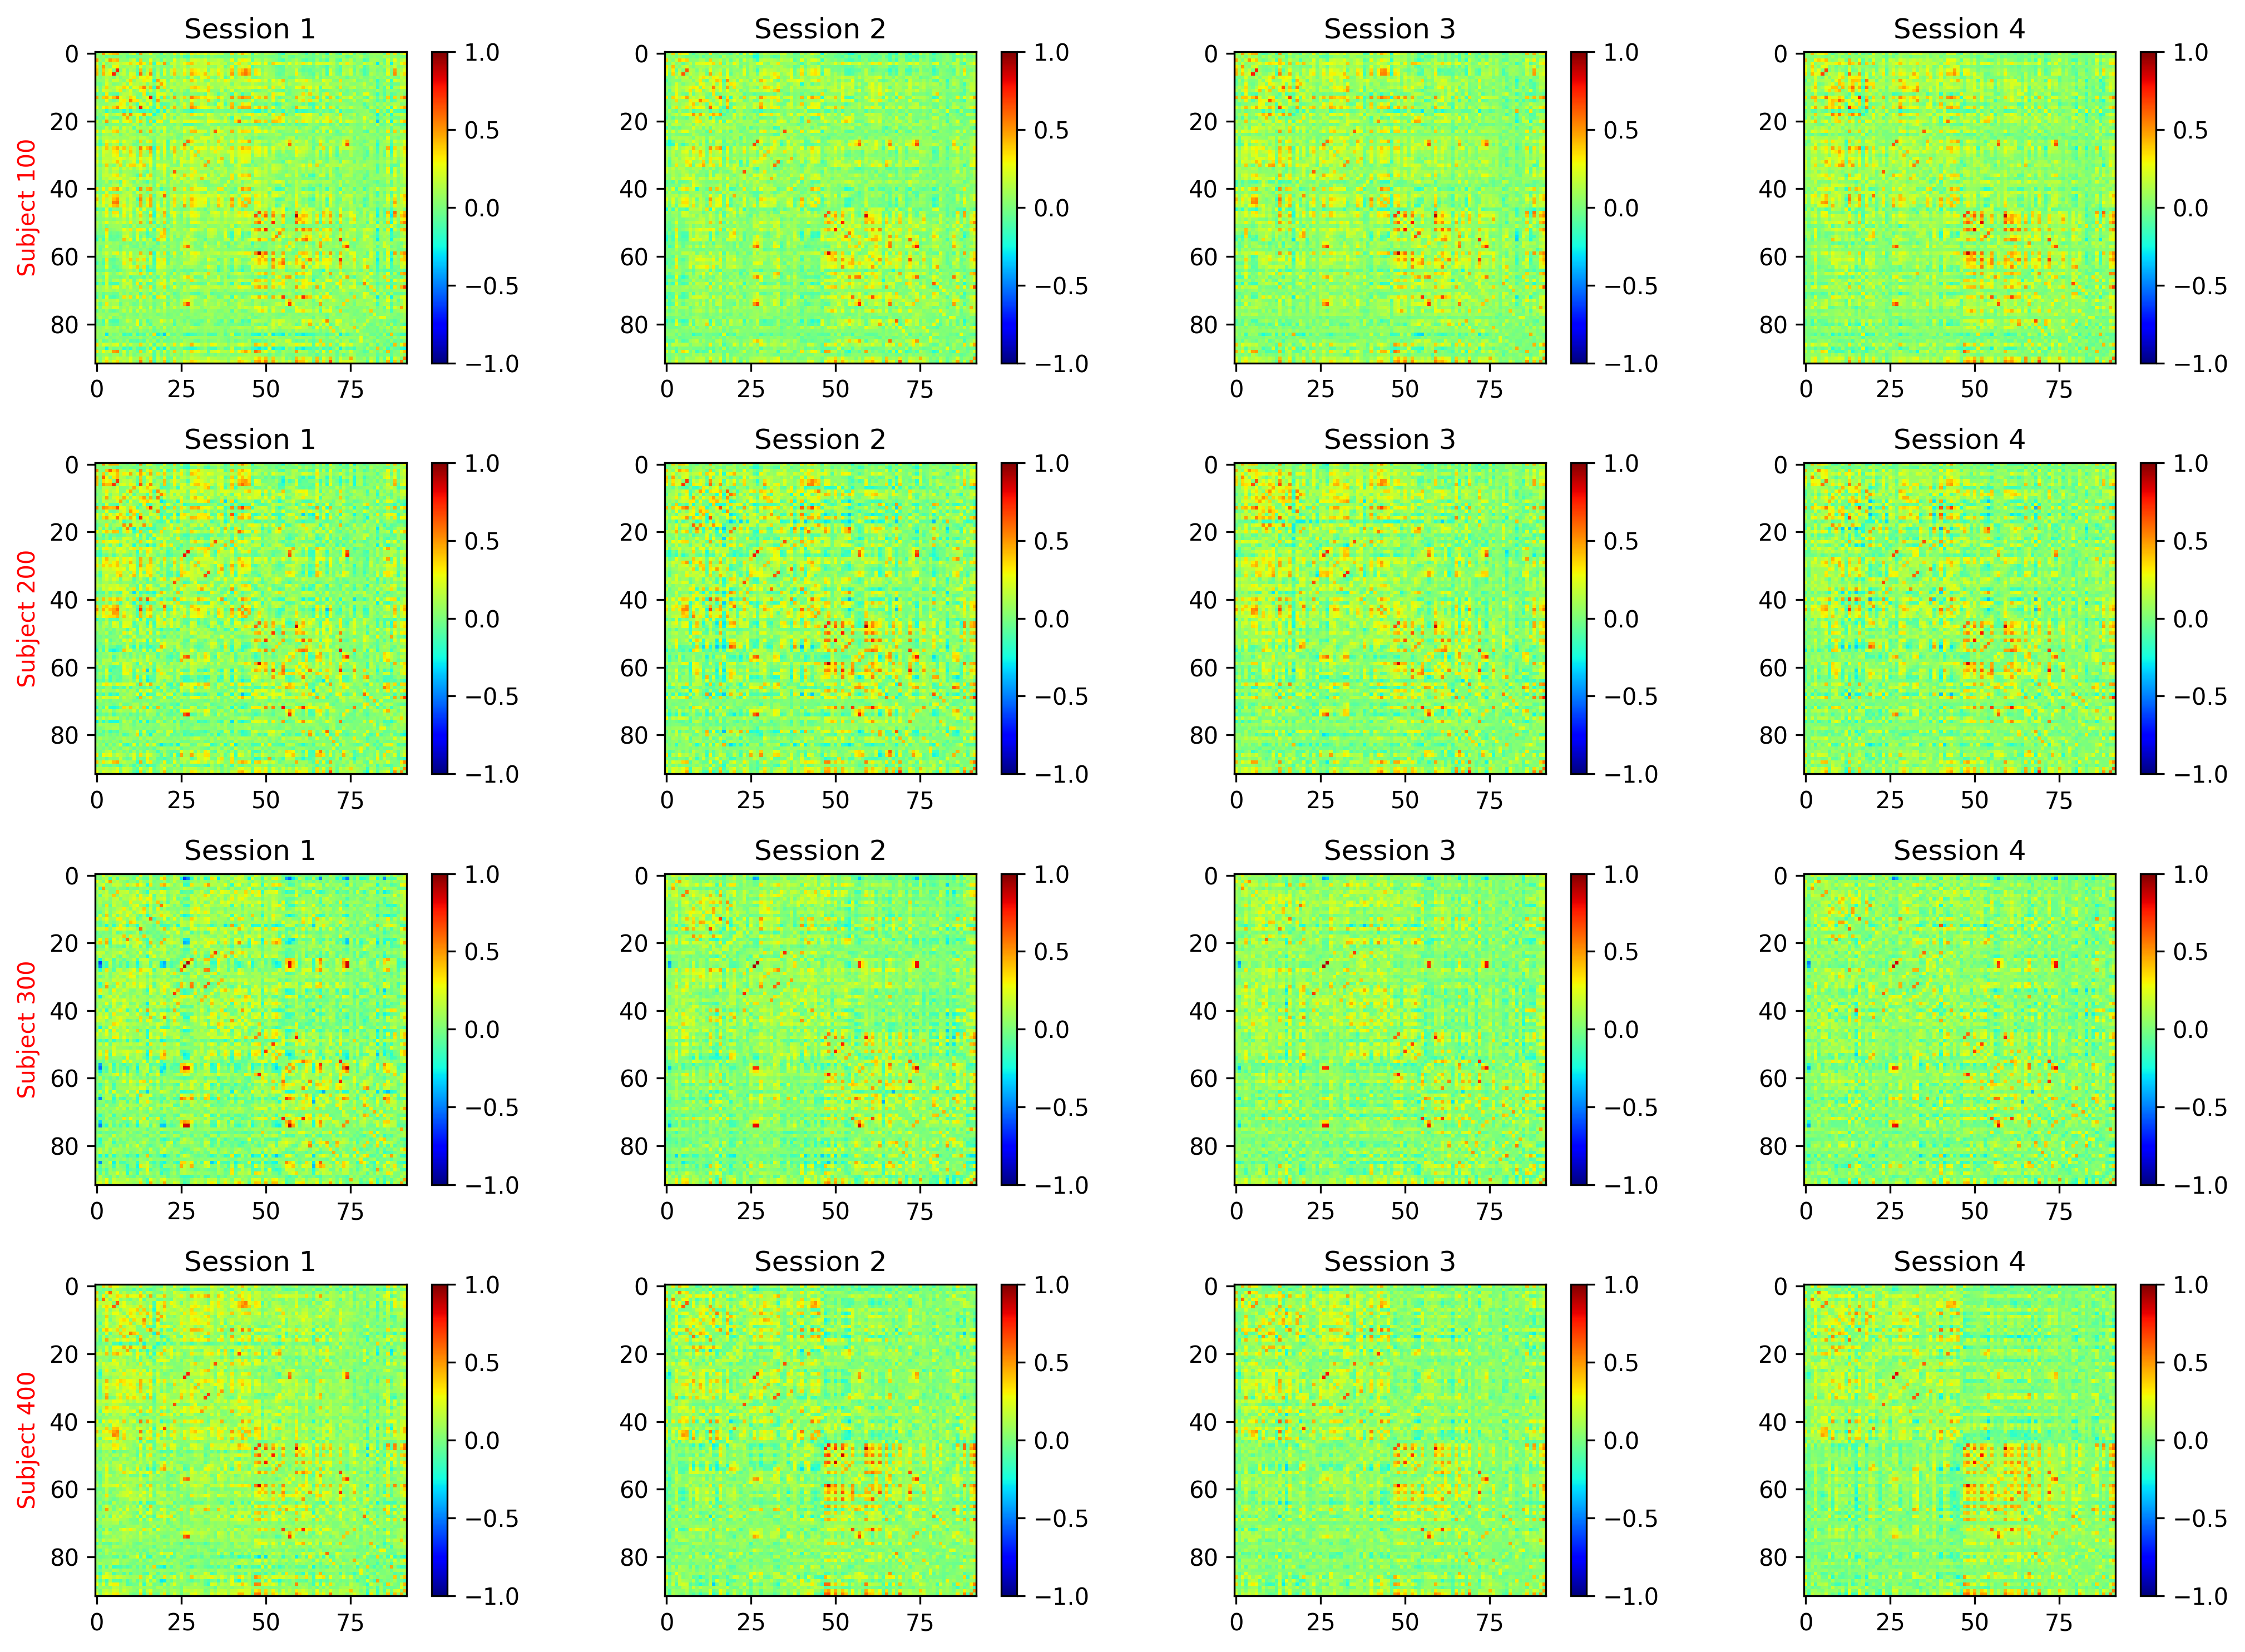

In [ ]:
SS = [100, 200, 300, 400] # subject indices
plt.figure(figsize=[14, 10], dpi=300)
for s in range(len(SS)):
    for i in range(4):
        plt.subplot(4, 4, s*4 + i + 1)
        plt.imshow(FC_mats[:, :, i, SS[s]-1], cmap='jet', vmin=-1, vmax=1)
        plt.colorbar()
        plt.title(f'Session {i+1}')
        if i == 0:
            plt.ylabel(f'Subject {SS[s]}', color='red')
plt.tight_layout()
plt.show()

## BOLD time series

Total data size: (1003, 4, 92, 1200)
(92,)
Stable ROI IDs: [33 88 54 84 23]
Dynamic ROI IDs: [90 78 71 83 85]


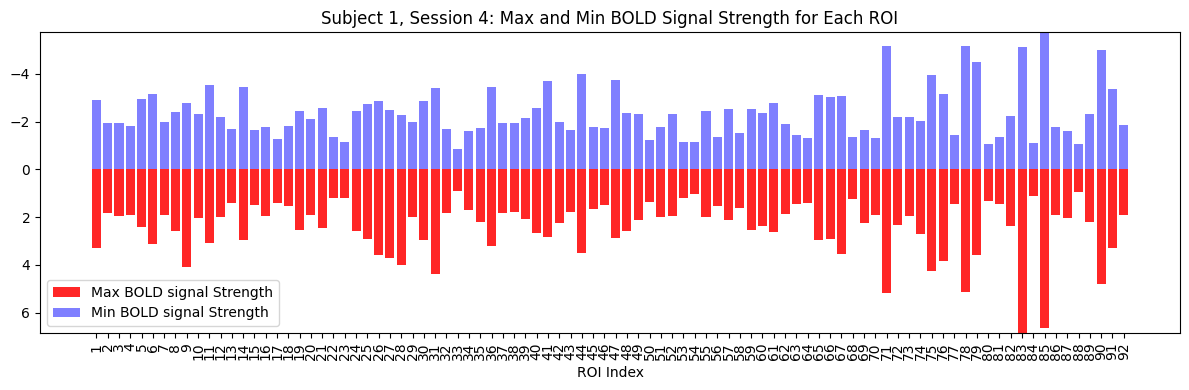

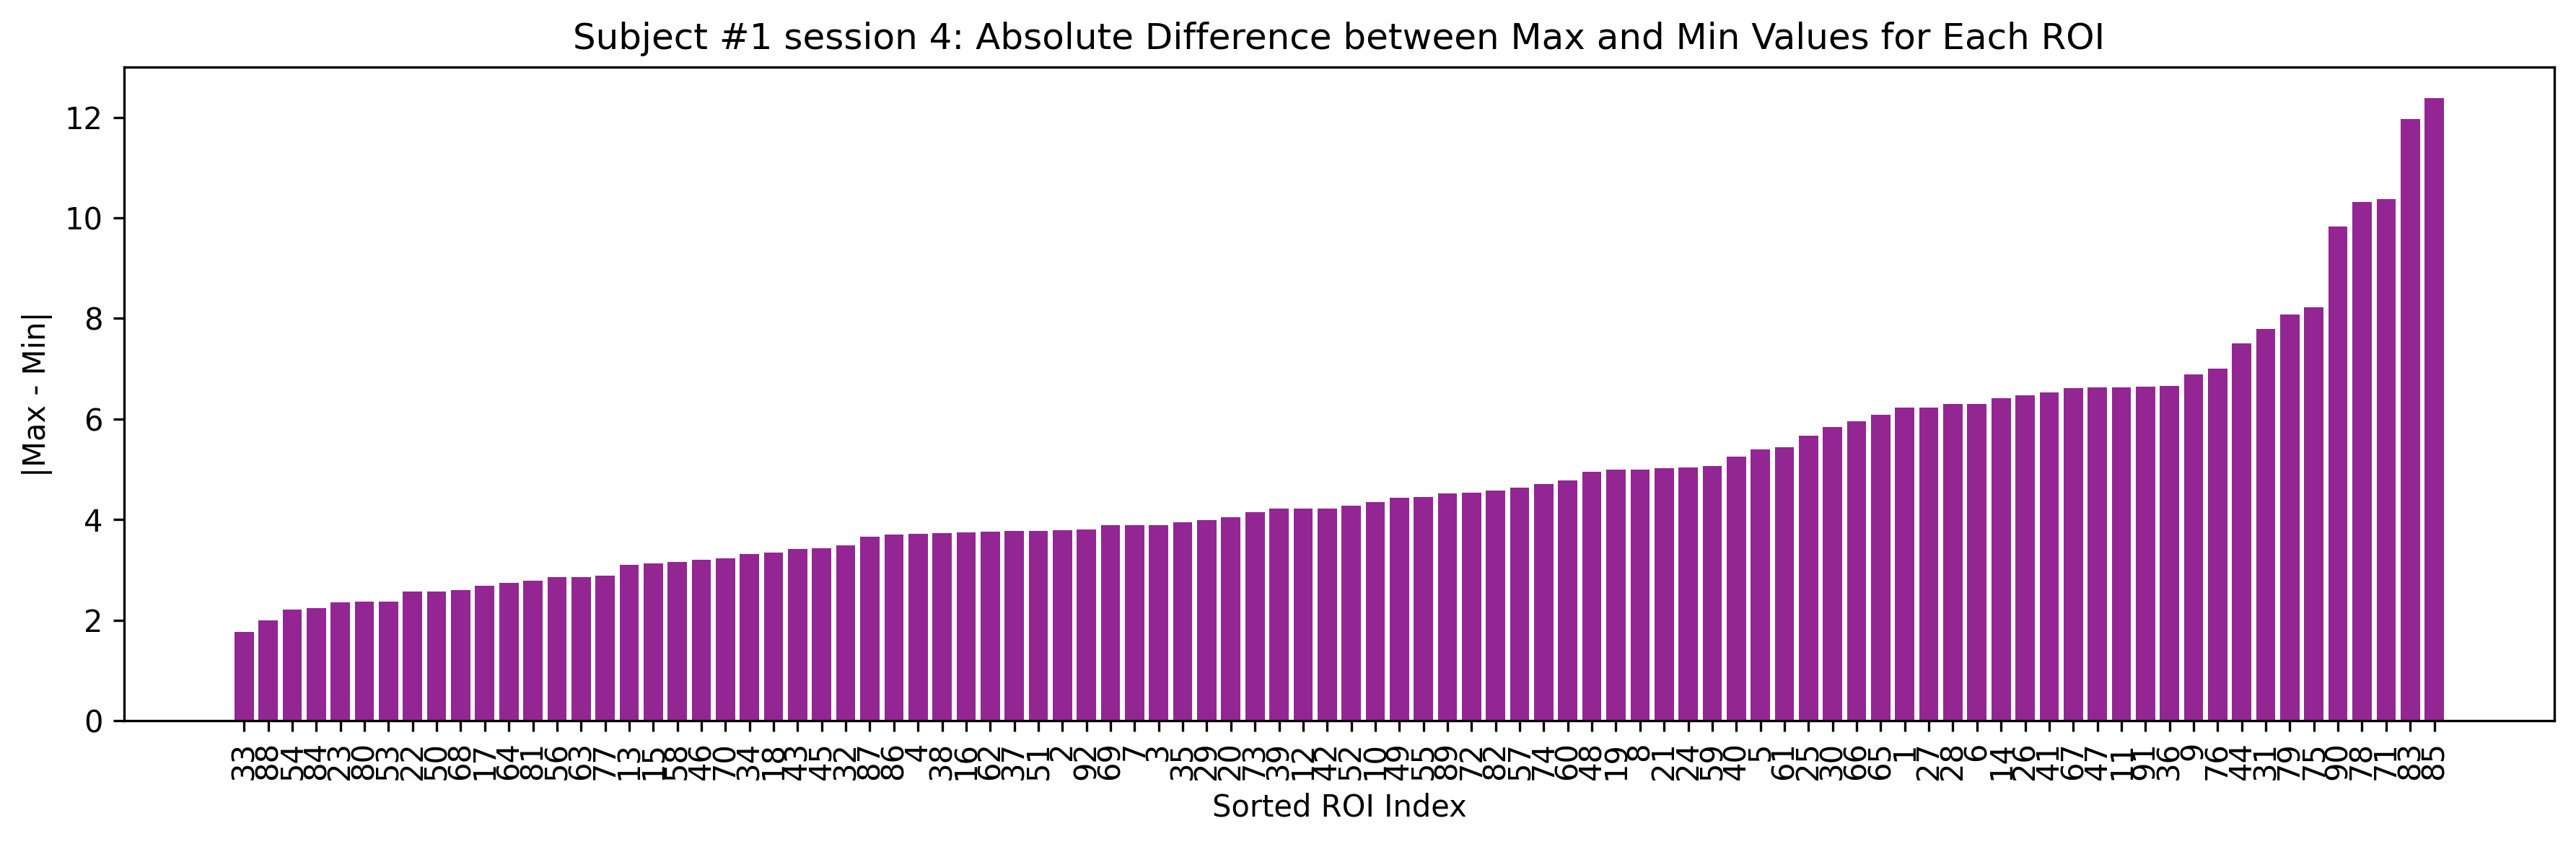

In [ ]:
print('Total data size:', ts_data.shape)
ss = 3
plt.figure(figsize=[12, 4], dpi=100)
max_vals =np.array([ts_data[0][ss][i].max() for i in range(92)])
min_vals =np.array([ts_data[0][ss][i].min() for i in range(92)])
plt.bar(np.arange(92), max_vals, color='red', alpha=0.85)
plt.bar(np.arange(92), min_vals, color='blue', alpha=0.5)
plt.xticks(np.arange(92), np.arange(1, 93), rotation=90)
plt.xlabel('ROI Index')
plt.legend(['Max BOLD signal Strength', 'Min BOLD signal Strength'])
plt.ylim([max_vals.max(), min_vals.min()])
plt.title(f'Subject 1, Session {ss+1}: Max and Min BOLD Signal Strength for Each ROI')
plt.tight_layout()

# Calculate the absolute difference between max and min values for each ROI's BOLD signal
abs_diff = np.abs(np.array(max_vals) - np.array(min_vals))
print(abs_diff.shape)
# Sort the absolute differences and get the sorted indices
sorted_indices = np.argsort(abs_diff)

# Plot the sorted absolute differences
plt.figure(figsize=[12, 4], dpi=300)
plt.bar(np.arange(len(abs_diff)), abs_diff[sorted_indices], color='purple', alpha=0.85)
plt.xticks(np.arange(len(abs_diff)), sorted_indices + 1, rotation=90)
plt.xlabel('Sorted ROI Index')
plt.ylabel('|Max - Min|')
plt.title(f'Subject #1 session {ss+1}: Absolute Difference between Max and Min Values for Each ROI')
plt.tight_layout()


print('Stable ROI IDs:', sorted_indices[:5]+1)
print('Dynamic ROI IDs:', sorted_indices[-5:]+1)

In [ ]:
!pip install ace_tools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_sessions = 4
num_rois = 92
stable_dynamic_results = []

for ss in range(num_sessions):
    max_vals = np.array([ts_data[9][ss][i].max() for i in range(num_rois)])
    min_vals = np.array([ts_data[9][ss][i].min() for i in range(num_rois)])

    abs_diff = np.abs(max_vals - min_vals)

    sorted_indices = np.argsort(abs_diff)

    stable_rois = sorted_indices[:5] + 1
    dynamic_rois = sorted_indices[-5:] + 1

    stable_dynamic_results.append([ss + 1, list(stable_rois), list(dynamic_rois)])

print("\nStable and Dynamic ROIs for Subject 10 across Sessions:\n")
for session, stable, dynamic in stable_dynamic_results:
    print(f"Session {session}:")
    print(f"  Stable ROIs: {stable}")
    print(f"  Dynamic ROIs: {dynamic}\n")


Stable and Dynamic ROIs for Subject 10 across Sessions:

Session 1:
  Stable ROIs: [54, 88, 80, 33, 68]
  Dynamic ROIs: [90, 71, 78, 83, 85]

Session 2:
  Stable ROIs: [33, 54, 88, 80, 68]
  Dynamic ROIs: [83, 71, 90, 78, 85]

Session 3:
  Stable ROIs: [88, 54, 33, 80, 68]
  Dynamic ROIs: [90, 78, 83, 71, 85]

Session 4:
  Stable ROIs: [33, 88, 54, 80, 68]
  Dynamic ROIs: [90, 78, 71, 83, 85]



In [ ]:
from collections import Counter

num_subjects = 1003
num_sessions = 4
num_rois = 92

stable_roi_counts = [Counter() for _ in range(num_sessions)]
dynamic_roi_counts = [Counter() for _ in range(num_sessions)]

for subj in range(num_subjects):
    for ss in range(num_sessions):

        max_vals = np.array([ts_data[subj][ss][i].max() for i in range(num_rois)])
        min_vals = np.array([ts_data[subj][ss][i].min() for i in range(num_rois)])

        abs_diff = np.abs(max_vals - min_vals)

        sorted_indices = np.argsort(abs_diff)

        stable_rois = sorted_indices[:5] + 1
        dynamic_rois = sorted_indices[-5:] + 1

        stable_roi_counts[ss].update(stable_rois)
        dynamic_roi_counts[ss].update(dynamic_rois)

session_results = []

for ss in range(num_sessions):
    most_common_stable = [roi for roi, _ in stable_roi_counts[ss].most_common(5)]
    most_common_dynamic = [roi for roi, _ in dynamic_roi_counts[ss].most_common(5)]
    session_results.append((ss + 1, most_common_stable, most_common_dynamic))

print("\nMost Frequent Stable and Dynamic ROIs Across Subjects:\n")
for session, stable, dynamic in session_results:
    print(f"Session {session}:")
    print(f"  Most Frequent Stable ROIs: {stable}")
    print(f"  Most Frequent Dynamic ROIs: {dynamic}\n")


Most Frequent Stable and Dynamic ROIs Across Subjects:

Session 1:
  Most Frequent Stable ROIs: [54, 33, 80, 88, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 75]

Session 2:
  Most Frequent Stable ROIs: [54, 33, 88, 80, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 71]

Session 3:
  Most Frequent Stable ROIs: [54, 33, 80, 88, 68]
  Most Frequent Dynamic ROIs: [83, 85, 78, 90, 71]

Session 4:
  Most Frequent Stable ROIs: [54, 33, 88, 80, 68]
  Most Frequent Dynamic ROIs: [85, 83, 78, 90, 71]



### Schaefer atlas information

In [ ]:
!pwd

/gdrive/MyDrive


In [ ]:
# Load the brain atlas labels with additional columns
import pandas as pd

df = pd.read_csv('./HPC/Schaefer2018_100Parcels_17Networks_order_info.txt', sep='\t', header=None)
data = np.array(df)
labels = data[0::2] # extract "roi names, left or right hemisphere, and subnetwork names"
extra_data = np.array([i[0].split(' ') for i in data[1::2]]) # extract "roi id, {x, y, z}, and color info"

badROIs = [9,14,43,60,61,78,89,93] # 8 regions with bad data

# labels = np.delete(labels, badROIs) # remove the bad ROIs
# extra_data = np.delete(extra_data, badROIs, axis=0) # remove the bad ROIs
# print(labels.shape)
# print(extra_data.shape)

### Note that in schaefer atlas, the region names are not explicitly given:
# e.g., ['LH', 'SomMotA', '2'], there is no explicit region name, only the hemisphere, subnetwork, and parcel index.
split_labels=[]
for label in labels:
    parts = label[0].split('_')[1:]
    if len(parts)==4:
        split_labels.append(parts)
    if len(parts) < 4: # some regions have no name info
        print('Region name is not explicitly given:', label)
        parts.insert(2, 'roi')
        split_labels.append(parts)

df_1 = pd.DataFrame(split_labels, columns=['Hemisphere', 'Subnetwork', 'Region', 'Parcel index'])
df_2 = pd.DataFrame(extra_data, columns=['ROI ID', 'X', 'Y', 'Z', 'Color'])

# Merge df and df_atlas by extending columns
df_atlas = pd.concat([df_1, df_2], axis=1)
df_atlas.drop([i-1 for i in badROIs], inplace=True)   #drop bad ROIs from the 100 regions.
df_atlas.reset_index(drop=True, inplace=True)
df_atlas.to_excel('Schaefer2018_92Parcels_17Networks_order_info.xlsx', index=False)
df_atlas

Region name is not explicitly given: ['17Networks_LH_SomMotA_1']
Region name is not explicitly given: ['17Networks_LH_SomMotA_2']
Region name is not explicitly given: ['17Networks_LH_TempPar_1']
Region name is not explicitly given: ['17Networks_RH_SomMotA_1']
Region name is not explicitly given: ['17Networks_RH_SomMotA_2']
Region name is not explicitly given: ['17Networks_RH_SomMotA_3']
Region name is not explicitly given: ['17Networks_RH_SomMotA_4']
Region name is not explicitly given: ['17Networks_RH_TempPar_1']
Region name is not explicitly given: ['17Networks_RH_TempPar_2']
Region name is not explicitly given: ['17Networks_RH_TempPar_3']


,Hemisphere,Subnetwork,Region,Parcel index,ROI ID,X,Y,Z,Color
0,LH,VisCent,ExStr,1,1,120,18,136,255
1,LH,VisCent,ExStr,2,2,120,18,137,255
2,LH,VisCent,Striate,1,3,120,18,138,255
3,LH,VisCent,ExStr,3,4,120,18,139,255
4,LH,VisPeri,ExStrInf,1,5,255,0,2,255
...,...,...,...,...,...,...,...,...,...
87,RH,DefaultC,Rsp,1,96,5,0,131,255
88,RH,DefaultC,PHC,1,97,5,0,132,255
89,RH,TempPar,roi,1,98,16,48,255,255
90,RH,TempPar,roi,2,99,13,41,250,255


array(['RH', 'DorsAttnA', 'ParOcc', '1'], dtype=object)

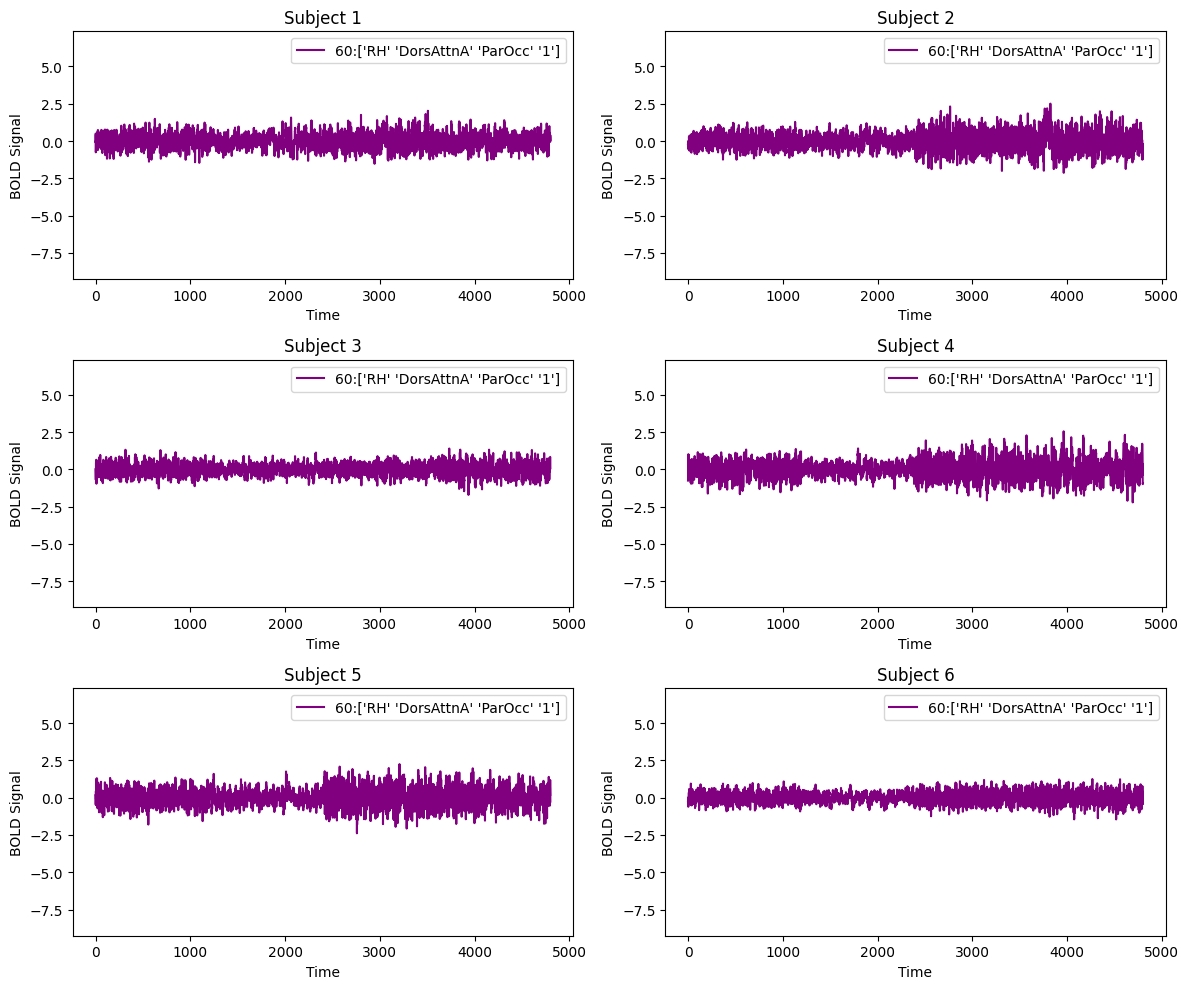

In [ ]:
global_min = np.min([reshaped_data.min() for reshaped_data in ts_data[:6].reshape(6, 92, 1200 * 4)])
global_max = np.max([reshaped_data.max() for reshaped_data in ts_data[:6].reshape(6, 92, 1200 * 4)])

plt.figure(figsize=[12,10],dpi = 100)
r_id = 60 # roi index    # 0, 20, 47,

df_atlas.iloc[r_id,]
for sub_id in range(6):   6 subjects
    reshaped_data = ts_data[sub_id].reshape(92, 1200 * 4).T    # reshape signals from [4, 92, 1200] to [4800, 92]
    plt.subplot(3,2,sub_id+1)
    plt.plot(reshaped_data[:,r_id], 'purple')
    plt.ylim(global_min-.5, global_max+.5) # normalize y-range
    plt.xlabel('Time')
    plt.ylabel('BOLD Signal')
    plt.title(f'Subject {sub_id+1}')
    plt.legend([f'{r_id}:{df_atlas.iloc[r_id,:4].values}'])
plt.tight_layout()

df_atlas.iloc[r_id,:4].values

(1003, 4, 92, 1200)


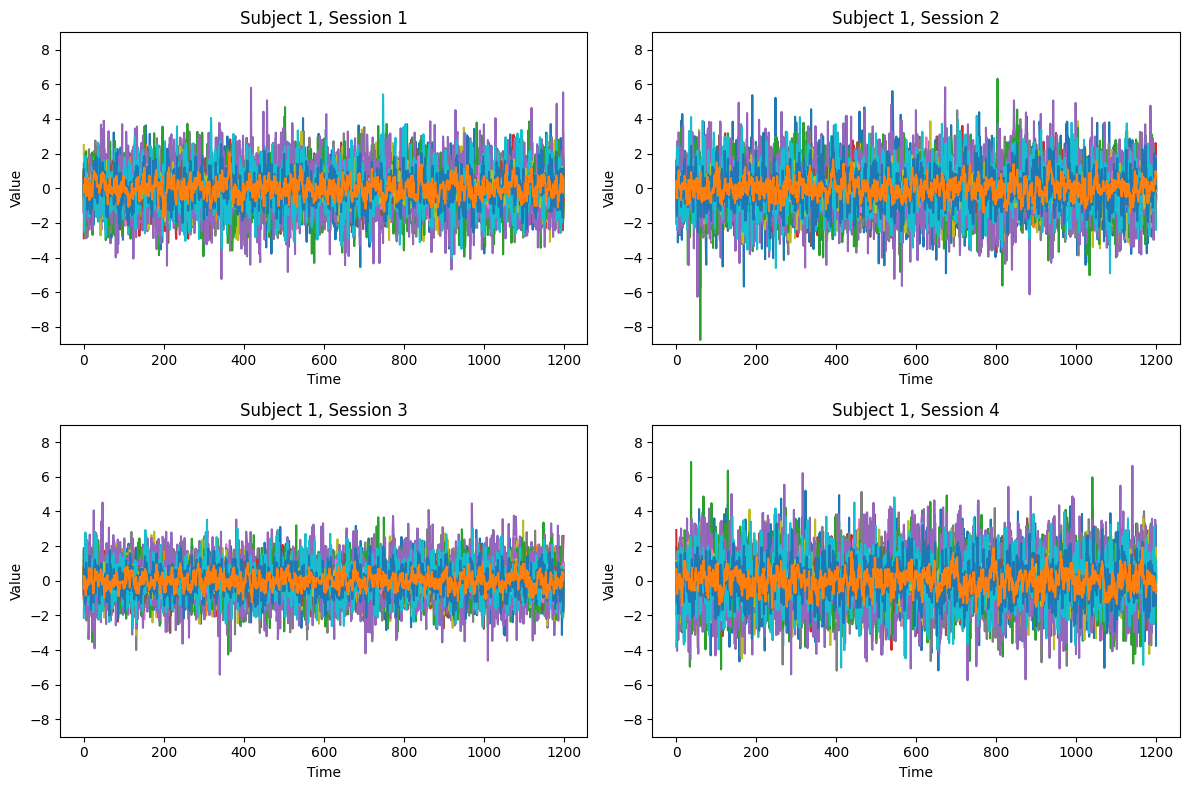

In [ ]:
'''visualize single subject's BOLD signals across 4 sessions'''

def plot_subject_fMRI_data(sub_id, ts_data):
    plt.figure(figsize=(12, 8))
    for s in range(4):
        plt.subplot(2,2, s+1)
        for i in range(ts_data[sub_id][s].shape[0]):
            sns.lineplot(data=ts_data[sub_id][s][i])
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.ylim([-9, 9])
        plt.title(f'Subject {sub_id+1}, Session {s+1}')

    plt.tight_layout()

# ts_data: [1003, 4, 92, 1200]
print(ts_data.shape)
plot_subject_fMRI_data(0, ts_data)
# plot_subject_fMRI_data(1, ts_data)

In [ ]:
exceeding_rois_per_session = {}
sub_id = 0
for s in range(num_sessions):
    exceeding_rois = []
    for i in range(ts_data[sub_id][s].shape[0]):
        if np.any(ts_data[sub_id][s][i] >= 7) or np.any(ts_data[sub_id][s][i] <= -7):
            exceeding_rois.append(i + 1)

    exceeding_rois_per_session[s + 1] = exceeding_rois

print("\nROIs with BOLD signal exceeding ±7 in at least one timepoint:\n")
for session, rois in exceeding_rois_per_session.items():
    print(f"Session {session}: {rois if rois else 'None'}\n")


ROIs with BOLD signal exceeding ±7 in at least one timepoint:

Session 1: None

Session 2: [83]

Session 3: None

Session 4: None



## Visualize Brain Atlas (Schaefer 2018)

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 54.5 MB/s eta 0:00:00


[_add_readme_to_default_data_locations] Added README.md to data

[get_dataset_dir] Dataset created in data/schaefer_2018

[fetch_single_file] Downloading data from 
https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/b
rain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_17Networks_order.txt ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[fetch_single_file] Downloading data from 
https://raw.githubusercontent.com/ThomasYeoLab/CBIG/v0.14.3-Update_Yeo2011_Schaefer2018_labelname/stable_projects/b
rain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_100Parcels_17Networks_order_FSLMNI152_2mm
.nii.gz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

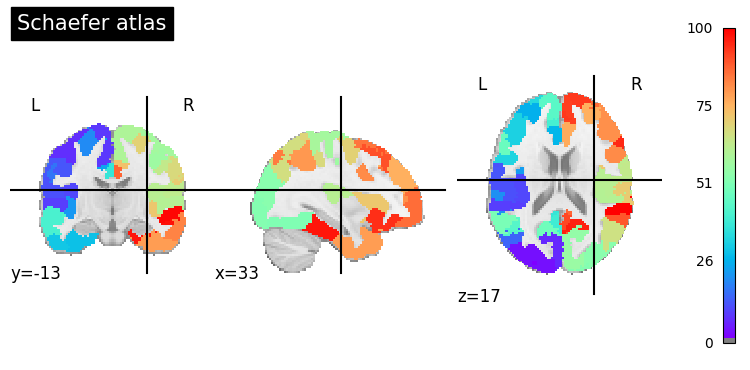

In [ ]:
from nilearn import datasets, plotting

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=17, resolution_mm=2, data_dir='data')
atlas_map = atlas['maps']
roi_labels = atlas['labels']

# Plot the brain rois
plotting.plot_roi(atlas_map, title="Schaefer atlas", cmap = 'rainbow', alpha=1, draw_cross=True, colorbar=True, annotate=True)

# Computing temporal graph

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def compute_temporal_graphs(ts_data, subject_idx=0, selected_sessions=[0], window_size=100, step_size=10):
    """
    Generate temporal graphs using a sliding window approach for selected sessions.

    Parameters:
    ts_data : ndarray
        Time series data of shape [subjects, sessions, regions, timepoints].
    subject_idx : int
        Index of the subject to process.
    selected_sessions : list
        List of session indices to include in analysis.
    window_size : int
        Size of the sliding window.
    step_size : int
        Step size for the sliding window.

    Returns:
    graphs : list
        List of NetworkX graphs representing functional connectivity over time.
    FC_mats : ndarray
        Functional connectivity matrices for visualization.
    """
    subject_data = ts_data[subject_idx]  # Shape: [sessions, regions, timepoints]

    # Concatenate only the selected session timepoints
    combined_timepoints = np.concatenate([subject_data[s] for s in selected_sessions], axis=1)  # Shape: [regions, selected_timepoints]
    total_timepoints = combined_timepoints.shape[1]

    # Normalize time series to avoid zero correlation issues
    combined_timepoints = (combined_timepoints - np.mean(combined_timepoints, axis=1, keepdims=True)) / np.std(combined_timepoints, axis=1, keepdims=True)

    # Compute the correct number of graphs
    num_graphs = (total_timepoints - window_size) // step_size + 1
    FC_mats = np.zeros((combined_timepoints.shape[0], combined_timepoints.shape[0], num_graphs))

    graphs = []
    graph_idx = 0
    for start in range(0, total_timepoints - window_size + 1, step_size):
        window = combined_timepoints[:, start:start + window_size]  # Shape: [regions, window_size]

        # Compute functional connectivity (Pearson correlation) correctly
        corr_matrix = np.corrcoef(window, rowvar=True)  # Correlation across regions
        np.fill_diagonal(corr_matrix, 0)  # Remove self-connections

        FC_mats[:, :, graph_idx] = corr_matrix  # Store at correct index

        # Create a graph
        G = nx.from_numpy_array(corr_matrix)
        graphs.append(G)

        graph_idx += 1

    return graphs, FC_mats

def visualize_fc_matrices(FC_mats, SS):
    """Visualize functional connectivity matrices for selected timepoints with adjusted color bar length."""
    plt.figure(figsize=(12, 6))
    num_plots = len(SS)
    for s, timepoint in enumerate(SS):
        ax = plt.subplot(1, num_plots, s + 1)
        im = ax.imshow(FC_mats[:, :, timepoint], cmap='jet', vmin=-1, vmax=1)
        ax.set_title(f'Timepoint {timepoint}')

        # Adjust color bar to match graph size
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

    plt.tight_layout()
    plt.show()

selected_sessions = [0]  # Select only session 1
temporal_graphs, FC_mats = compute_temporal_graphs(ts_data, subject_idx=0, selected_sessions=selected_sessions, window_size=100, step_size=5)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def visualize_fc_matrices(FC_mats, SS):
    """Visualize functional connectivity matrices for selected timepoints with adjusted color bar length."""
    plt.figure(figsize=(12, 6))
    num_plots = len(SS)
    for s, timepoint in enumerate(SS):
        ax = plt.subplot(1, num_plots, s + 1)
        im = ax.imshow(FC_mats[:, :, timepoint], cmap='jet', vmin=-1, vmax=1)
        ax.set_title(f'Timepoint {timepoint}')

        # Adjust color bar to match graph size
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

    plt.tight_layout()
    plt.show()

111 (92, 92, 111)


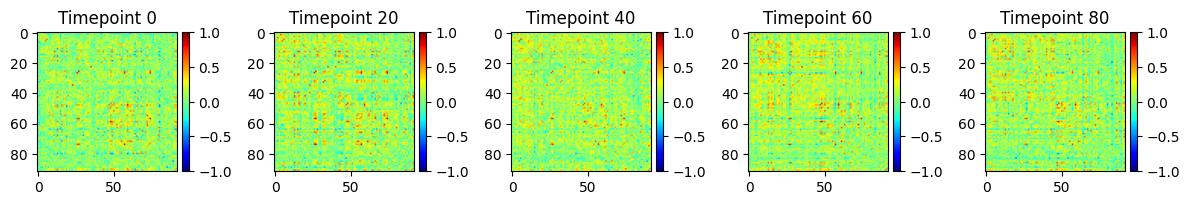

In [ ]:
SS = [0, 20, 40, 60, 80]
print(len(temporal_graphs), FC_mats.shape)
visualize_fc_matrices(FC_mats, SS)

In [7]:
FC_mats[:, :, 0]

array([[ 0.        ,  0.02253104,  0.21461262, ..., -0.03002459,
         0.09334907,  0.14284688],
       [ 0.02253104,  0.        ,  0.04197265, ..., -0.00742696,
        -0.12679929, -0.17863022],
       [ 0.21461262,  0.04197265,  0.        , ..., -0.28068554,
         0.05075447, -0.09506923],
       ...,
       [-0.03002459, -0.00742696, -0.28068554, ...,  0.        ,
         0.19622616,  0.08585113],
       [ 0.09334907, -0.12679929,  0.05075447, ...,  0.19622616,
         0.        ,  0.48063857],
       [ 0.14284688, -0.17863022, -0.09506923, ...,  0.08585113,
         0.48063857,  0.        ]])

### weighted graph

In [6]:
weighted_graph = np.transpose(FC_mats,(2, 0, 1))
print(weighted_graph.shape)

(221, 92, 92)


### binary matrices

In [7]:
import numpy as np
import networkx as nx

def compute_binary_temporal_graphs(FC_mats, threshold=0.1):
    """
    Compute binary adjacency matrices from functional connectivity matrices.

    Parameters:
    FC_mats : ndarray
        Functional connectivity matrices over time (shape: [regions, regions, timepoints]).
    threshold : float
        Threshold to binarize the correlation matrix.

    Returns:
    binary_matrices : list
        List of binary adjacency matrices (numpy arrays) over time.
    """
    binary_matrices = []

    for i in range(FC_mats.shape[2]):  # Iterate over time points
        correlation_matrix = FC_mats[:, :, i]

        # Convert to binary adjacency matrix using the threshold
        binary_matrix = (np.abs(correlation_matrix) > threshold).astype(int)

        # Store binary matrix
        binary_matrices.append(binary_matrix)

    return binary_matrices

binary_temporal_graphs = compute_binary_temporal_graphs(FC_mats, threshold=0.1)
binary_temporal_graphs[0]

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])

In [8]:
binary_temporal_graphs_len = len(binary_temporal_graphs)
print(len(binary_temporal_graphs), np.array(binary_temporal_graphs).shape)

221 (221, 92, 92)


## adaptive lookback

In [11]:
import numpy as np
import networkx as nx

# Function to compute novelty index for a single session
def compute_novelty_index(dynfc_matrices):
    novelty_indices = []
    seen_edges = set()

    for matrix in dynfc_matrices:
        current_graph = nx.from_numpy_array(matrix)
        current_edges = set(current_graph.edges())

        new_edges = current_edges - seen_edges
        total_edges = len(current_edges)

        if total_edges > 0:
            novelty_index = len(new_edges) / total_edges
        else:
            novelty_index = 0

        novelty_indices.append(novelty_index)
        seen_edges.update(current_edges)

    # Calculate average novelty index for the session
    average_novelty_index = np.mean(novelty_indices)
    return novelty_indices, average_novelty_index

# Compute novelty index for each session and the average novelty index
novelty_indices_per_session = []
average_novelty_indices = []

session_dynfc_matrices = binary_temporal_graphs
novelty_indices, average_novelty_index = compute_novelty_index(session_dynfc_matrices)

novelty_indices_per_session.append(novelty_indices)
average_novelty_indices.append(average_novelty_index)

# Print results for the current session
print(f"Session {0 + 1}:")
print(f"Novelty Indices: {novelty_indices}")
print(f"Average Novelty Index: {average_novelty_index}\n")

# Print average novelty indices for all sessions
print("Average Novelty Index for Each Session:")
print(average_novelty_indices)

Session 1:
Novelty Indices: [1.0, 0.13008130081300814, 0.23809523809523808, 0.20945945945945946, 0.25157232704402516, 0.171875, 0.22695035460992907, 0.17647058823529413, 0.07027027027027027, 0.11, 0.07035175879396985, 0.17857142857142858, 0.1111111111111111, 0.16143497757847533, 0.06451612903225806, 0.11931818181818182, 0.11855670103092783, 0.17813765182186234, 0.06779661016949153, 0.09787234042553192, 0.06140350877192982, 0.08152173913043478, 0.05670103092783505, 0.08374384236453201, 0.06735751295336788, 0.1043956043956044, 0.10240963855421686, 0.09876543209876543, 0.06470588235294118, 0.041176470588235294, 0.04838709677419355, 0.023809523809523808, 0.05699481865284974, 0.031578947368421054, 0.027777777777777776, 0.07258064516129033, 0.03636363636363636, 0.13559322033898305, 0.06201550387596899, 0.0759493670886076, 0.04201680672268908, 0.06293706293706294, 0.058394160583941604, 0.052941176470588235, 0.03773584905660377, 0.06666666666666667, 0.07834101382488479, 0.04411764705882353, 0.

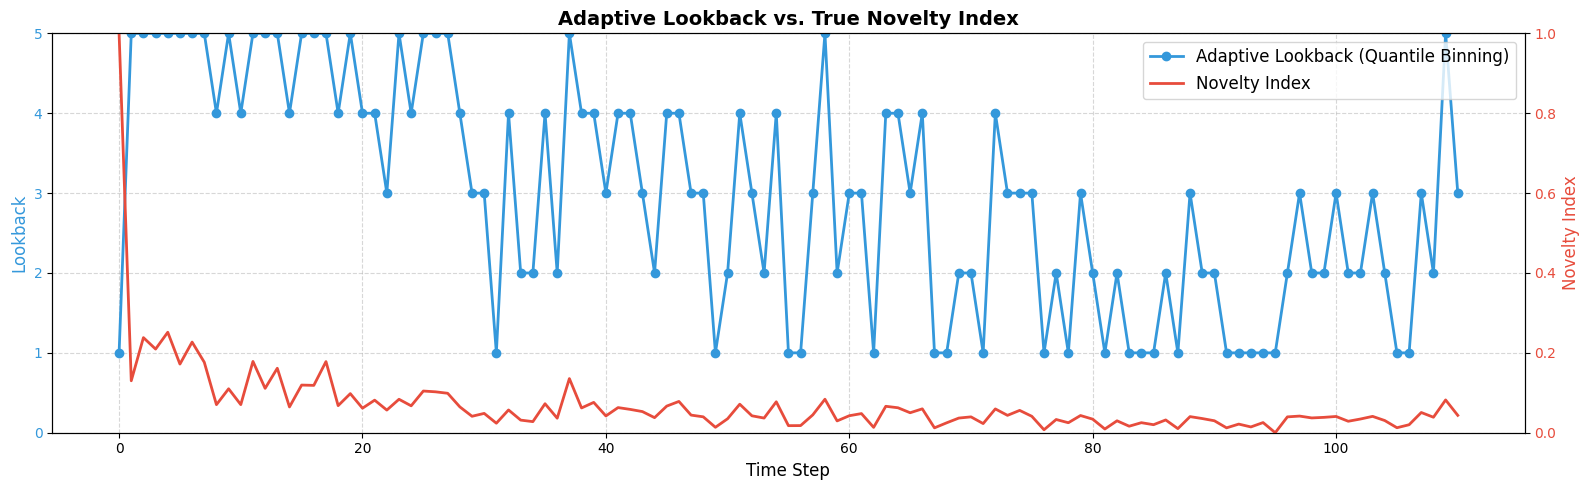

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Ignore the first value
novelty_indices_wo_first = novelty_indices[1:]

# Quantile binning function
def quantile_binning(novelties, min_lookback=1, max_lookback=5):
    novelties = np.array(novelties)
    num_bins = max_lookback - min_lookback + 1
    quantiles = np.quantile(novelties, np.linspace(0, 1, num_bins + 1))

    lookbacks = []
    for n in novelties:
        for i in range(num_bins):
            if quantiles[i] <= n <= quantiles[i + 1]:
                lookbacks.append(min_lookback + i)
                break
    return lookbacks

# Recompute lookbacks
adaptive_lookbacks_wo_first = quantile_binning(novelty_indices_wo_first)
adaptive_lookbacks = [1] + adaptive_lookbacks_wo_first


# Plot using original (unsmoothed) novelty values
fig, ax1 = plt.subplots(figsize=(16, 5))

# Left y-axis: Lookback
ax1.set_xlabel("Time Step", fontsize=12)
ax1.set_ylabel("Lookback", fontsize=12, color="#3498DB")
ax1.plot(adaptive_lookbacks, label="Adaptive Lookback (Quantile Binning)", color="#3498DB", marker="o", linewidth=2)
ax1.tick_params(axis='y', labelcolor="#3498DB")
ax1.set_ylim(0, 5)

# Right y-axis: true novelty values scaled to match visual range
ax2 = ax1.twinx()
ax2.set_ylabel("Novelty Index", fontsize=12, color="#E74C3C")
ax2.plot(np.array(novelty_indices) * 5, label="Novelty Index", color="#E74C3C", linewidth=2)
ax2.set_ylim(0, 5)
ax2_ticks = np.linspace(0, 5, 6)
ax2.set_yticks(ax2_ticks)
ax2.set_yticklabels([f"{tick / 5:.1f}" for tick in ax2_ticks])
ax2.tick_params(axis='y', labelcolor="#E74C3C")

# Title and grid
plt.title("Adaptive Lookback vs. True Novelty Index", fontsize=14, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()

## TEA plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def plot_tea_plot(dynfc_matrices, session_idx):
    graph_list = [nx.from_numpy_array(matrix) for matrix in dynfc_matrices]

    repeated_edges = [0]
    new_graph = nx.Graph()
    for i in range(1, len(graph_list)):
        new_graph = nx.compose(new_graph, graph_list[i-1])
        repeated_edges.append(nx.intersection(new_graph, graph_list[i]).number_of_edges())

    num_edges = [np.count_nonzero(matrix) for matrix in dynfc_matrices]
    new_edges = [num_edges[i] - repeated_edges[i] for i in range(len(num_edges))]

    # Debugging
    print(f"repeated_edges[0]: {repeated_edges[0]}")  # Should be 0
    print(f"num_edges[0]: {num_edges[0]}")
    print(f"new_edges[0]: {new_edges[0]}")  # Should be equal to num_edges[0]

    # Ensure first time step is all new edges
    repeated_edges[0] = 0
    new_edges[0] = num_edges[0]

    plt.figure(figsize=(12, 6))

    # Ensure correct stacking
    plt.bar(np.arange(len(repeated_edges)), repeated_edges, color='b', label="Repeated Edges")
    plt.bar(np.arange(len(new_edges)), new_edges, bottom=np.array(repeated_edges), color='r', label="New Edges")

    plt.legend(fontsize=18)
    plt.xlabel('Time', fontsize=18)
    plt.ylabel('Edges', fontsize=18)
    plt.title(f'TEA Plot of Edges Over Time for Session {session_idx + 1}', fontsize=20)
    plt.show()


In [ ]:
temp = np.transpose(FC_mats, (2, 0, 1))
plot_tea_plot(np.array(temporal_graphs), 0)

NetworkXError: Input array must be 2D, not 1

## cosine similarity

#### weighted

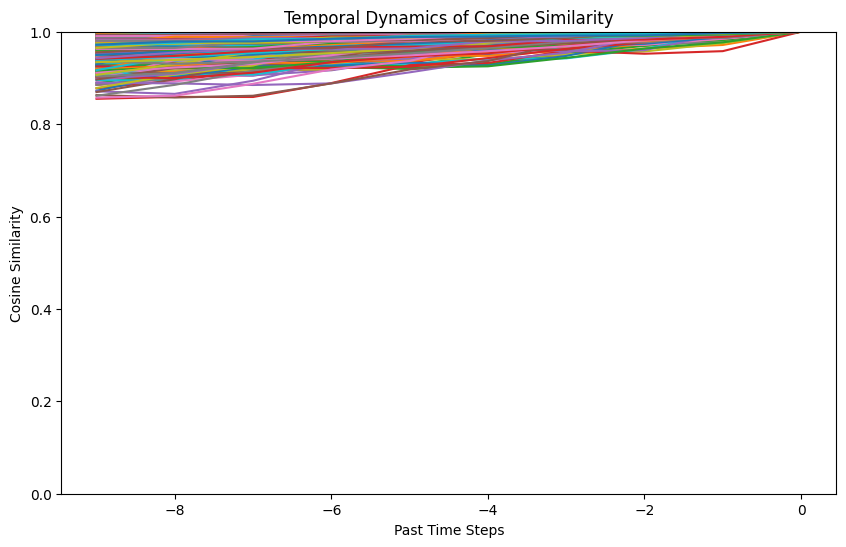

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

window_size = 100
stride = 1
num_rois = 92
num_timepoints_per_session = 1200  # each session has 1200 timepoints
num_sessions = 4
num_windows_per_session = (num_timepoints_per_session - window_size) // stride + 1

# Initialize an empty list to store cosine similarity values
cosine_similarities = []

# Index of the reference time step (time step 10)
reference_time_step = 10

temp = np.transpose(FC_mats, (2, 0, 1))

# Iterate over time steps starting from time step 9 to num_windows_per_session - 1
for t in range(reference_time_step - 1, num_windows_per_session - 1):
    # Compute the cosine similarity between the adjacency matrix at time step t and the adjacency matrices of its past 10 time steps
    cosine_sim_values = []
    for i in range(reference_time_step):
        cosine_sim = cosine_similarity(temp[t], temp[t - i - 1])
        cosine_sim_values.append(cosine_sim[0, 0])
    cosine_similarities.append(cosine_sim_values)

# Reverse the order of each sublist in cosine_similarities
cosine_similarities = [sim_values for sim_values in cosine_similarities]

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(cosine_similarities)):
    x_values = range(0, -reference_time_step, -1)  # Adjust x-axis range
    y_values = cosine_similarities[i]  # Adjust y-axis data
    # Shift y_values such that the first value becomes 1.0
    y_values = [1.0] + y_values[:-1]
    plt.plot(x_values, y_values)

plt.xlabel('Past Time Steps')
plt.ylabel('Cosine Similarity')
plt.title('Temporal Dynamics of Cosine Similarity')

# Adjust y-axis limits
plt.ylim(0, 1)

plt.show()

#### binary

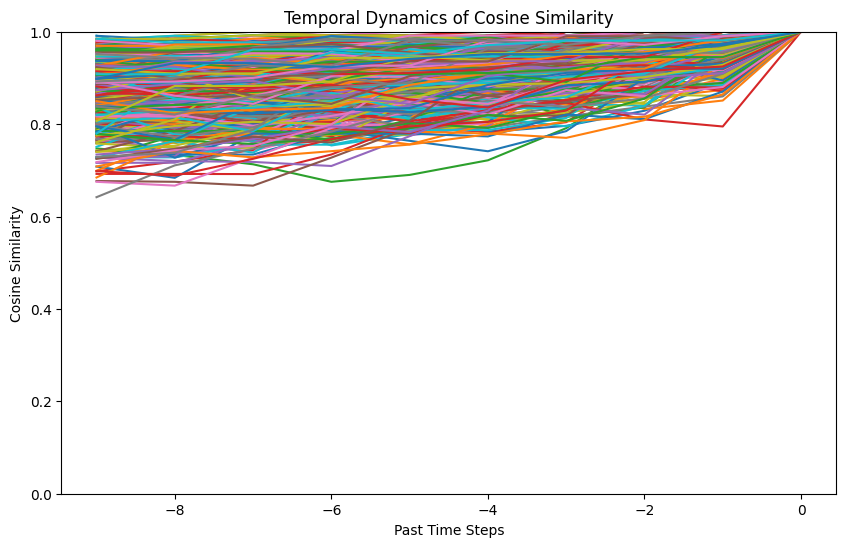

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

window_size = 100
stride = 1
num_rois = 92
num_timepoints_per_session = 1200  # each session has 1200 timepoints
num_sessions = 4
num_windows_per_session = (num_timepoints_per_session - window_size) // stride + 1

# Initialize an empty list to store cosine similarity values
cosine_similarities = []

# Index of the reference time step (time step 10)
reference_time_step = 10

# Iterate over time steps starting from time step 9 to num_windows_per_session - 1
for t in range(reference_time_step - 1, num_windows_per_session - 1):
    # Compute the cosine similarity between the adjacency matrix at time step t and the adjacency matrices of its past 10 time steps
    cosine_sim_values = []
    for i in range(reference_time_step):
        cosine_sim = cosine_similarity(np.array(binary_temporal_graphs)[t], np.array(binary_temporal_graphs)[t - i - 1])
        cosine_sim_values.append(cosine_sim[0, 0])
    cosine_similarities.append(cosine_sim_values)

# Reverse the order of each sublist in cosine_similarities
cosine_similarities = [sim_values for sim_values in cosine_similarities]

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(cosine_similarities)):
    x_values = range(0, -reference_time_step, -1)  # Adjust x-axis range
    y_values = cosine_similarities[i]  # Adjust y-axis data
    # Shift y_values such that the first value becomes 1.0
    y_values = [1.0] + y_values[:-1]
    plt.plot(x_values, y_values)

plt.xlabel('Past Time Steps')
plt.ylabel('Cosine Similarity')
plt.title('Temporal Dynamics of Cosine Similarity')

# Adjust y-axis limits
plt.ylim(0, 1)

plt.show()

# Model

## prepare data

In [9]:
# Prepare data function
def prepare_data_adaptive(dynfc_matrices, adaptive_lookbacks):
    dataset = {}
    hop_dict = {}
    scale_terms_dict = {}
    triplet_dict = {}
    scale_dict = {}

    num_windows, num_nodes, _ = dynfc_matrices.shape

    for i in range(len(adaptive_lookbacks)):
        lookback = adaptive_lookbacks[i]
        if i < lookback:
            continue

        B = np.zeros((num_nodes, lookback + 1, num_nodes))
        for j in range(lookback + 1):
            B[:, j, :] = dynfc_matrices[i - lookback + j]
        dataset[i] = B

        hops = get_hops(dynfc_matrices[i], lookback)
        scale_terms = {
            h if h != -1 else max(hops.keys()) + 1:
            hops[h].sum(1) if h != -1 else hops[1].shape[0] - hops[h].sum(1)
            for h in hops
        }

        hop_dict[i] = hops
        scale_terms_dict[i] = scale_terms

        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        triplet_dict[i] = triplet
        scale_dict[i] = scale

    return dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict

def prepare_data(dynfc_matrices, lookback):
    dataset = {}
    hop_dict = {}
    scale_terms_dict = {}
    triplet_dict = {}
    scale_dict = {}

    num_windows, num_nodes, _ = dynfc_matrices.shape

    for i in range(lookback, num_windows):
        B = np.zeros((num_nodes, lookback + 1, num_nodes))
        for j in range(lookback + 1):
            adj_matr = dynfc_matrices[i - lookback + j]
            B[:, j, :] = adj_matr
        dataset[i] = B

    for i in range(lookback, num_windows):
        hops = get_hops(dynfc_matrices[i], lookback) #!!!!
        scale_terms = {h if h != -1 else max(hops.keys()) + 1:
                       hops[h].sum(1) if h != -1 else hops[1].shape[0] - hops[h].sum(1)
                       for h in hops}
        hop_dict[i] = hops
        scale_terms_dict[i] = scale_terms

        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        triplet_dict[i] = triplet
        scale_dict[i] = scale

    return dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict

# Define function to sample last hop
def sample_last_hop(dynfc_matrices, nodes):
    num_windows, num_nodes, _ = dynfc_matrices.shape
    sampled = np.random.randint(0, num_nodes, len(nodes))
    for window_idx in range(num_windows):
        window_matrix = dynfc_matrices[window_idx]
        nnz = np.nonzero(window_matrix[nodes, sampled])[0]
        while len(nnz) != 0:
            new_sample = np.random.randint(0, num_nodes, len(nnz))
            sampled[nnz] = new_sample
            nnz = np.nonzero(window_matrix[nnz, new_sample])[0]
    return sampled

# Define function to sample all hops
def sample_all_hops(hops, nodes=None):
    N = hops[1].shape[0]
    if nodes is None:
        nodes = np.arange(N)
    sampled_nodes = []
    for node in nodes:
        node_samples = [node]
        for h in hops.keys():
            if h != -1:
                if len(hops[h]) == 0:
                    node_samples.append(-1)
                else:
                    node_samples.append(np.random.choice(hops[h][node]))
        node_samples.append(np.random.randint(0, N))
        sampled_nodes.append(node_samples)
    return np.array(sampled_nodes)

# Define function to get hops
def get_hops(dynfc_matrices, K=2):
    num_windows, num_nodes = dynfc_matrices.shape
    hops = {1: dynfc_matrices.copy(), -1: dynfc_matrices.copy()}
    np.fill_diagonal(hops[1], 0)
    for h in range(2, K + 1):
        next_hop = np.dot(hops[h - 1], dynfc_matrices)
        next_hop[next_hop > 0] = 1
        for prev_h in range(1, h):
            next_hop -= np.multiply(next_hop, hops[prev_h])
        np.fill_diagonal(next_hop, 0)
        hops[h] = next_hop
        hops[-1] += next_hop
    return hops

# Define function to convert to triplets
def to_triplets(sampled_nodes, scale_terms):
    triplets = []
    triplet_scale_terms = []
    for i, j in itertools.combinations(np.arange(1, sampled_nodes.shape[1]), 2):
        triplet = sampled_nodes[:, [0] + [i, j]]
        triplet = triplet[(triplet[:, 1] != -1) & (triplet[:, 2] != -1)]
        triplet = triplet[(triplet[:, 0] != triplet[:, 1]) & (triplet[:, 0] != triplet[:, 2])]
        triplets.append(triplet)
        triplet_scale_terms.append(scale_terms[i][triplet[:, 1]] * scale_terms[j][triplet[:, 2]])
    return np.row_stack(triplets), np.concatenate(triplet_scale_terms)


## GDGMamba

### mamba2

In [14]:
!pip3 install torch_geometric ray mamba-ssm[causal-conv1d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.

In [15]:
import torch_geometric.transforms as T
import os

# from utils import *
import pickle
import json
# from exp_mod import get_MAP_avg
import ray
from ray import tune
from ray import train, tune
from ray.tune.search.optuna import OptunaSearch

from torch.utils.data import Dataset, DataLoader
from torch_geometric.utils import dense_to_sparse
from torch_geometric.data import Data

import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

import itertools

from torch.nn import ELU,Dropout

from mamba_ssm import Mamba2
from tqdm import tqdm


from torch.nn.utils import clip_grad_norm_

from torch.nn import (
    BatchNorm1d,
    Embedding,
    Linear,
    ModuleList,
    ReLU,
    Sequential,
)

from torch_geometric.nn import GINEConv, global_add_pool
import inspect
from typing import Any, Dict, Optional

import torch.nn.functional as F
from torch import Tensor
from torch.nn import Dropout, Linear, Sequential

from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import reset
from torch_geometric.nn.resolver import (
    activation_resolver,
    normalization_resolver,
)
from torch_geometric.typing import Adj
from torch_geometric.utils import to_dense_batch

# from mamba_ssm import Mamba
from torch_geometric.utils import degree, sort_edge_index

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch_geometric.transforms as T
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse

torch.backends.cudnn.deterministic=True
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)



# Check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


def get_graph_data(x):
    x = torch.tensor(x, dtype=torch.float32)

    # Create placeholders for edge_index and edge_attr
    edge_index_list = []
    edge_attr_list = []


    adj_matrix = x
    edge_index, edge_attr = dense_to_sparse(adj_matrix)
    edge_index_list.append(edge_index)
    edge_attr_list.append(edge_attr)

    edge_index = torch.cat(edge_index_list, dim=1)
    edge_attr = torch.cat(edge_attr_list, dim=0)

    batch = torch.zeros(x.size(0), dtype=torch.long)

    return x, edge_index, edge_attr, batch


# def val_loss(t):
#     l = []
#     for j in range(63, 72):
#         _, muval, sigmaval = t(val_data[j])
#         val_l = build_loss(triplet_dict[j], scale_dict[j], muval, sigmaval, 64, scale=False)
#         l.append(val_l.cpu().detach().numpy())
#     return np.mean(l)


def Energy_KL(mu, sigma, pairs, L):
    ij_mu = mu[pairs]
    ij_sigma = sigma[pairs]
    sigma_ratio = ij_sigma[:, 1] / (ij_sigma[:, 0] + 1e-14)
    trace_fac = torch.sum(sigma_ratio, 1)
    log_det = torch.sum(torch.log(sigma_ratio + 1e-14), 1)
    mu_diff_sq = torch.sum(torch.square(ij_mu[:, 0] - ij_mu[:, 1]) / (ij_sigma[:, 0] + 1e-14), 1)
    return 0.5 * (trace_fac + mu_diff_sq - L - log_det)


# Define loss function
def build_loss(triplets, scale_terms, mu, sigma, L, scale):
    hop_pos = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 1])], 1).type(torch.int64)
    hop_neg = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 2])], 1).type(torch.int64)
    eng_pos = Energy_KL(mu, sigma, hop_pos, L)
    eng_neg = Energy_KL(mu, sigma, hop_neg, L)
    energy = torch.square(eng_pos) + torch.exp(-eng_neg)
    if scale:
        loss = torch.mean(energy * torch.Tensor(scale_terms).cpu())
    else:
        loss = torch.mean(energy)
    return loss

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree


class ApplyConv(torch.nn.Module):
    def __init__(self,mamba_attn,dropout, channels: int, conv: Optional[MessagePassing], norm: Optional[str] = 'batch_norm', norm_kwargs: Optional[Dict[str, Any]] = None):
        super().__init__()
        self.conv = conv
        norm_kwargs = norm_kwargs or {}
        self.norm1 = normalization_resolver(norm, channels, **norm_kwargs)
        self.dropout = dropout # add this line to set dropout rate
        self.mamba = mamba_attn
        self.pe_lin = Linear(2, channels)

    def forward(
            self,
            x: Tensor,
            edge_index: Adj,
            batch: Optional[torch.Tensor] = None,
            edge_attr: Optional[Tensor] = None,
            **kwargs,
    ) -> Tensor:

        hs = []
        if self.conv is not None:
            h = self.conv(x, edge_index, edge_attr, **kwargs)
            h = F.dropout(h, p=self.dropout, training=self.training)
            h = h + x #96,96
            h = self.norm1(h)
            hs.append(h)

        inp_mamba = x.reshape(1,x.size(0), x.size(1)) #1,96,96  Batch , time stamp , features

        h = self.mamba(inp_mamba)
        h = h.mean(dim=0) #96,96
        hs.append(h)

        out = sum(hs) #96,96
        return out

class MambaG2G(torch.nn.Module):
    def __init__(self, config, dim_in, dim_out, dropout=0.2):
        super(MambaG2G, self).__init__()
        self.D = dim_in
        self.elu = nn.ELU()
        # self.mamba = Mamba(d_model=config['d_model'], d_state=config['d_state'], d_conv=config['d_conv'])
        # self.conv_mamba = Mamba(d_model=config['d_model'], d_state=config['d_state'], d_conv=config['d_conv'])

        self.mamba = Mamba2(
            # This module uses roughly 3 * expand * d_model^2 parameters
            d_model=config['d_model'], # Model dimension d_model
            d_state=config['d_state'],  # SSM state expansion factor, typically 64 or 128
            d_conv=config['d_conv'],    # Local convolution width
            headdim=config['headdim'],
            d_ssm=None,
            expand=2,       # This is a multiplier
            ngroups=6       # 96*2 / 6 = 32 (divisible by 8)
        )
        self.conv_mamba = Mamba2(
            # This module uses roughly 3 * expand * d_model^2 parameters
            d_model=config['d_model'], # Model dimension d_model
            d_state=config['d_state'],  # SSM state expansion factor, typically 64 or 128
            d_conv=config['d_conv'],    # Local convolution width
            headdim=config['headdim'],
            d_ssm=None,
            expand=2,       # This is a multiplier
            ngroups=6       # 96*2 / 6 = 32 (divisible by 8)
        )

        # Define a sequential model for GINEConv
        nn_model = Sequential(Linear(dim_in, dim_in), ReLU(), Linear(dim_in, dim_in))

        # Correctly instantiate GINEConv with the sequential model
        self.conv = ApplyConv(self.conv_mamba,dropout,dim_in, GINEConv(nn_model))

        # self.enc_input_fc = nn.Linear(dim_in, dim_in)
        self.dropout = nn.Dropout(p=dropout)  # Add Dropout layer
        self.out_fc = nn.Linear(config['d_model'], self.D)  # Adjusted to match output dimension
        self.sigma_fc = nn.Linear(self.D, dim_out)
        self.mu_fc = nn.Linear(self.D, dim_out)
        self.edge_emb = Embedding(2, dim_in)

    def forward(self, input):
        # e = self.enc_input_fc(input)
        # print("input shape:", input.shape)
        # pad_first = 96 - input.shape[0]  # = 4
        # pad_last = 96 - input.shape[2]   # = 4

        # # Pad first dimension (dim=0)
        # pad_front = torch.zeros(pad_first, input.shape[1], input.shape[2], device="cuda")
        # input = torch.cat([input, pad_front], dim=0)

        # # Pad last dimension (dim=2)
        # pad_end = torch.zeros(input.shape[0], input.shape[1], pad_last, device="cuda")
        # input = torch.cat([input, pad_end], dim=2)

        # print("Padded shape:", input.shape)

        z = []
        for i in range(input.size(1)):
            x = input[:, i, :]
            x, edge_index, edge_attr, batch = get_graph_data(x)
            edge_attr = self.edge_emb(edge_attr.int())
            x = self.conv(x,edge_index, batch=batch, edge_attr=edge_attr)
            z.append(x)
        # print("z shape 1:", z.shape)
        z = torch.stack(z, 1)
        # print("z shape 2:", z.shape)
        e = self.mamba(z)
        # print("e shape after mamba:", e.shape)
        e = e.mean(dim=1)  # Average pooling to maintain the expected shape
        e = self.dropout(e)  # Apply dropout after average pooling
        x = torch.tanh(self.out_fc(e))
        x = self.elu(x)
        x = self.dropout(x)  # Apply dropout after the activation
        mu = self.mu_fc(x)
        sigma = self.sigma_fc(x)
        sigma = self.elu(sigma) + 1 + 1e-14

        return x, mu, sigma

cuda:0


#### util file

In [11]:
import random
import scipy.sparse as sp
from scipy.sparse import csr_matrix
import itertools
import math
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from scipy.sparse import coo_matrix
from scipy import sparse

L_list = 64

def sample_zero_forever(mat):
    nonzero_or_sampled = set(zip(*mat.nonzero()))
    while True:
        t = tuple(np.random.randint(0, mat.shape[0], 2))
        if t not in nonzero_or_sampled:
            yield t
            nonzero_or_sampled.add(t)

def sample_zero_n(mat, n=1000):
    itr = sample_zero_forever(mat)
    return [next(itr) for _ in range(n)]

def find_and_sample_zero_entries(sparse_matrix, num_samples=None):
    # Convert sparse matrix to dense format
    dense_matrix = sparse_matrix.toarray()

    # Create a boolean array: True where elements are zero
    zero_mask = dense_matrix == 0

    # Get the indices of zero elements
    zero_indices = np.argwhere(zero_mask)

    # Check if sampling is requested
    if num_samples is not None and num_samples > 0:
        # Ensure that there are enough zero entries to sample from
        if num_samples > len(zero_indices):
            raise ValueError("Requested more samples than available zeros.")
        # Sample indices randomly without replacement
        sampled_indices = zero_indices[np.random.choice(len(zero_indices), num_samples, replace=False)]
        return sampled_indices
    return zero_indices

def get_inf(mu_64, sigma_64, lookback,mult):
    return_dict = {}
    #     for i in range (1, len(val_timestep) - 30):
    count = 0
    for ctr in train_data.keys():

        # A_node = data[ctr][0].shape[0]
        A_node = 96
        train_data_s = {
                    i: sp.csr_matrix(train_data[i].cpu().numpy())
                    for i in train_data
                }

        A = train_data_s[ctr]

        if count > 0:
            if A_node > A_prev_node:
                A = A[:A_prev_node, :A_prev_node]

            if ctr <= list(train_data.keys())[-1] and ctr > 0:

                ones_edj = A.nnz
                if A.shape[0] * mult <= (A.shape[0] - 1) * (A.shape[0] - 1):
                    zeroes_edj = A.shape[0] * mult
                else:
                    zeroes_edj = (A.shape[0] - 1) * (A.shape[0] - 1) - A.nnz

                tot = ones_edj + zeroes_edj

                # Ensure A is in COO format
                A_coo = A.tocoo() if not isinstance(A, coo_matrix) else A

                # Get the pairs directly from the COO format properties
                val_ones = list(zip(A_coo.row, A_coo.col))

                val_ones = list(map(list, val_ones))

                val_zeros = find_and_sample_zero_entries(A, zeroes_edj)

                val_edges = np.row_stack((val_ones, val_zeros))

                val_ground_truth = A[val_edges[:, 0], val_edges[:, 1]].A1

                a, b = unison_shuffled_copies(val_edges, val_ground_truth, count)

                if ctr >= 0:

                    a_embed = np.array(mu_64[ctr - lookback])[a.astype(int)]

                    a_embed_stacked = np.vstack(a_embed)  # This stacks all [0] and [1] vertically

                    # Since we know every pair [0] and [1] are stacked sequentially, we can reshape:
                    n_features = a_embed.shape[2]  # Number of features in each sub-array
                    inp_clf_temp = a_embed_stacked.reshape(tot, 2 * n_features)

                    inp_clf = torch.tensor(inp_clf_temp)

                    inp_clf = inp_clf.to(device)
                    return_dict[ctr] = [inp_clf,b]
        # A_prev_node = data[ctr][0].shape[0]
        A_prev_node = 96
        count = count + 1
    return return_dict

def get_MAP_avg(mu_arr,sigma_arr,lookback):
    MAP_l = []
    MRR_l = []
    time_list = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

    for l_num in range(len(L_list)):

        mu_64 = mu_arr[l_num]
        sigma_64 = sigma_arr[l_num]


        class Classifier(torch.nn.Module):
            def __init__(self):
                super(Classifier, self).__init__()
                activation = torch.nn.ReLU()

                self.mlp = torch.nn.Sequential(torch.nn.Linear(in_features=np.array(mu_64[0]).shape[1] * 2,
                                                               out_features=np.array(mu_64[0]).shape[1]),
                                               activation,
                                               torch.nn.Linear(in_features=np.array(mu_64[0]).shape[1],
                                                               out_features=1))

            def forward(self, x):
                return self.mlp(x)


        seed = 5
        torch.cuda.manual_seed_all(seed)
        classify = Classifier()
        classify.to(device)

        loss = torch.nn.BCEWithLogitsLoss(reduce=False)

        optim = torch.optim.Adam(classify.parameters(), lr=1e-3)
        mult = 10
        mult_test = 50
        num_epochs = 50
        return_dict = get_inf(mu_64, sigma_64, lookback,mult)
        for epoch in range(num_epochs):
            #     for i in range (1, len(val_timestep) - 30):
            count = 0
            # for ctr in range(lookback + 1, 63):
            for ctr in train_data.keys():

                # A_node = data[ctr][0].shape[0]
                # A_node = 96
                # A = data[ctr][0]

                if count > 0:

                    if ctr <= list(train_data.keys())[-1] and ctr > 0:

                        if ctr >= 0:
                            classify.train()
                            decompose = return_dict[ctr]
                            inp_clf = decompose[0]
                            b = decompose[1]
                            out = classify(inp_clf).squeeze()

                            weight = torch.tensor([0.1, 0.9]).to(device)

                            label = torch.tensor(np.asarray(b)).to(device)

                            weight_ = weight[label.data.view(-1).long()].view_as(label)

                            l = loss(out, label)

                            l = l * weight_
                            l = l.mean()

                            optim.zero_grad()

                            l.backward()
                            optim.step()


                # A_prev_node = data[ctr][0].shape[0]
                A_prev_node = 96
                count = count + 1

        num_epochs = 1
        MAP_time = []
        MRR_time = []
        time_ctr = 0
        for epoch in range(num_epochs):
            get_MAP_avg = []
            get_MRR_avg = []

            #     for i in range (70, len(val_timestep)):
            count = 0

            for ctr in test_data.keys():

                # A_node = data[ctr][0].shape[0]
                A_node = 96
                # A = data[ctr][0]
                test_data_s = {
                    i: sp.csr_matrix(test_data[i].cpu().numpy())
                    for i in test_data
                }

                A = test_data_s[ctr]

                if count > 0:
                    if A_node > A_prev_node:
                        A = A[:A_prev_node, :A_prev_node]

                    if ctr >= 0:
                        # logging.debug('Testing')


                        ones_edj = A.nnz
                        if A.shape[0] * mult_test <= (A.shape[0] - 1) * (A.shape[0] - 1):
                            zeroes_edj = A.shape[0] * mult_test
                        else:
                            zeroes_edj = (A.shape[0] - 1) * (A.shape[0] - 1) - A.nnz

                        tot = ones_edj + zeroes_edj

                        val_ones = list(set(zip(*A.nonzero())))
                        val_ones = random.sample(val_ones, ones_edj)
                        val_ones = [list(ele) for ele in val_ones]
                        val_zeros = sample_zero_n(A, zeroes_edj)
                        val_zeros = [list(ele) for ele in val_zeros]
                        val_edges = np.row_stack((val_ones, val_zeros))

                        val_ground_truth = A[val_edges[:, 0], val_edges[:, 1]].A1

                        a, b = unison_shuffled_copies(val_edges, val_ground_truth, count)

                        if ctr > 0:

                            a_embed = np.array(mu_64[ctr - (lookback + 1)])[a.astype(int)]
                            a_embed_sig = np.array(sigma_64[ctr - (lookback + 1)])[a.astype(int)]

                            classify.eval()

                            inp_clf = []
                            for d_id in range(tot):
                                inp_clf.append(np.concatenate((a_embed[d_id][0], a_embed[d_id][1]), axis=0))

                            inp_clf = torch.tensor(np.asarray(inp_clf))

                            inp_clf = inp_clf.to(device)
                            with torch.no_grad():
                                out = classify(inp_clf).squeeze()

                            weight = torch.tensor([0.1, 0.9]).to(device)
                            #                         pos_weight = torch.ones([1])*9  # All weights are equal to 1

                            label = torch.tensor(np.asarray(b)).to(device)

                            weight_ = weight[label.data.view(-1).long()].view_as(label)

                            l = loss(out, label)

                            l = l * weight_
                            l = l.mean()

                            MAP_val = get_MAP_e(out.cpu(), label.cpu(), None)
                            get_MAP_avg.append(MAP_val)

                            MRR = get_MRR(out.cpu(), label.cpu(), np.transpose(a))

                            get_MRR_avg.append(MRR)

                            try:
                                if ctr == time_list[time_ctr]:
                                    MAP_time.append(MAP_val)
                                    MRR_time.append(MRR)
                                    time_ctr = time_ctr + 1
                            except:
                                pass

                            # logging.debug(
                            #     'Epoch: {}, Timestep: {}, Loss: {}, MAP: {}, MRR: {}, Running Mean MAP: {}, Running Mean MRR: {}'.format(
                            #         epoch, ctr, l.item(), get_MAP_e(out.cpu(), label.cpu(), None), MRR,
                            #         np.asarray(get_MAP_avg).mean(), np.asarray(get_MRR_avg).mean()))

                # A_prev_node = data[ctr][0].shape[0]
                A_prev_node = 96
                count = count + 1
        MAP_l.append(MAP_time)
        MRR_l.append(MRR_time)
        return np.asarray(get_MAP_avg).mean() , np.asarray(get_MRR_avg).mean()

def unison_shuffled_copies(a, b, seed):
    assert len(a) == len(b)
    np.random.seed(seed)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def get_MAP_e(predictions,true_classes, adj):

    probs = predictions
    probs = probs.detach().cpu().numpy()
    true_classes = true_classes
    adj = adj

    var = average_precision_score(true_classes, probs)

    return var

def get_MRR(predictions,true_classes, adj):
    probs = predictions

    probs = probs.detach().cpu().numpy()
    true_classes = true_classes
    adj = adj


    pred_matrix = sp.coo_matrix((probs,(adj[0],adj[1]))).toarray()
    true_matrix = sp.coo_matrix((true_classes,(adj[0],adj[1]))).toarray()

    row_MRRs = []
    for i, pred_row in enumerate(pred_matrix):
            #check if there are any existing edges
        if np.isin(1,true_matrix[i]):
            row_MRRs.append(get_row_MRR(pred_row,true_matrix[i]))

    avg_MRR = torch.tensor(row_MRRs).mean()
    return avg_MRR

def get_row_MRR(probs,true_classes):
    existing_mask = true_classes == 1
        #descending in probability
    ordered_indices = np.flip(probs.argsort())

    ordered_existing_mask = existing_mask[ordered_indices]

    existing_ranks = np.arange(1,
                                   true_classes.shape[0]+1,
                                   dtype=np.float64)[ordered_existing_mask]

    MRR = (1/existing_ranks).sum()/existing_ranks.shape[0]
    return MRR

### mamba1

In [81]:
import torch_geometric.transforms as T
import os

# from utils import *
import pickle
import json
# from exp_mod import get_MAP_avg
import ray
from ray import tune
from ray import train, tune
from ray.tune.search.optuna import OptunaSearch

from torch.utils.data import Dataset, DataLoader
from torch_geometric.utils import dense_to_sparse
from torch_geometric.data import Data

import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

import itertools

from torch.nn import ELU,Dropout

from mamba_ssm import Mamba
from tqdm import tqdm


from torch.nn.utils import clip_grad_norm_

from torch.nn import (
    BatchNorm1d,
    Embedding,
    Linear,
    ModuleList,
    ReLU,
    Sequential,
)

from torch_geometric.nn import GINEConv, global_add_pool
import inspect
from typing import Any, Dict, Optional

import torch.nn.functional as F
from torch import Tensor
from torch.nn import Dropout, Linear, Sequential

from torch_geometric.nn.conv import MessagePassing
from torch_geometric.nn.inits import reset
from torch_geometric.nn.resolver import (
    activation_resolver,
    normalization_resolver,
)
from torch_geometric.typing import Adj
from torch_geometric.utils import to_dense_batch

# from mamba_ssm import Mamba
from torch_geometric.utils import degree, sort_edge_index

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch_geometric.transforms as T
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse

torch.backends.cudnn.deterministic=True
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)



# Check GPU availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


def get_graph_data(x):
    x = torch.tensor(x, dtype=torch.float32)

    # Create placeholders for edge_index and edge_attr
    edge_index_list = []
    edge_attr_list = []


    adj_matrix = x
    edge_index, edge_attr = dense_to_sparse(adj_matrix)
    edge_index_list.append(edge_index)
    edge_attr_list.append(edge_attr)

    edge_index = torch.cat(edge_index_list, dim=1)
    edge_attr = torch.cat(edge_attr_list, dim=0)

    batch = torch.zeros(x.size(0), dtype=torch.long)

    return x, edge_index, edge_attr, batch


# def val_loss(t):
#     l = []
#     for j in range(63, 72):
#         _, muval, sigmaval = t(val_data[j])
#         val_l = build_loss(triplet_dict[j], scale_dict[j], muval, sigmaval, 64, scale=False)
#         l.append(val_l.cpu().detach().numpy())
#     return np.mean(l)


def Energy_KL(mu, sigma, pairs, L):
    ij_mu = mu[pairs]
    ij_sigma = sigma[pairs]
    sigma_ratio = ij_sigma[:, 1] / (ij_sigma[:, 0] + 1e-14)
    trace_fac = torch.sum(sigma_ratio, 1)
    log_det = torch.sum(torch.log(sigma_ratio + 1e-14), 1)
    mu_diff_sq = torch.sum(torch.square(ij_mu[:, 0] - ij_mu[:, 1]) / (ij_sigma[:, 0] + 1e-14), 1)
    return 0.5 * (trace_fac + mu_diff_sq - L - log_det)


# Define loss function
def build_loss(triplets, scale_terms, mu, sigma, L, scale):
    hop_pos = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 1])], 1).type(torch.int64)
    hop_neg = torch.stack([torch.tensor(triplets[:, 0]), torch.tensor(triplets[:, 2])], 1).type(torch.int64)
    eng_pos = Energy_KL(mu, sigma, hop_pos, L)
    eng_neg = Energy_KL(mu, sigma, hop_neg, L)
    energy = torch.square(eng_pos) + torch.exp(-eng_neg)
    if scale:
        loss = torch.mean(energy * torch.Tensor(scale_terms).cpu())
    else:
        loss = torch.mean(energy)
    return loss

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree


class ApplyConv(torch.nn.Module):
    def __init__(self,mamba_attn,dropout, channels: int, conv: Optional[MessagePassing], norm: Optional[str] = 'batch_norm', norm_kwargs: Optional[Dict[str, Any]] = None):
        super().__init__()
        self.conv = conv
        norm_kwargs = norm_kwargs or {}
        self.norm1 = normalization_resolver(norm, channels, **norm_kwargs)
        self.dropout = dropout # add this line to set dropout rate
        self.mamba = mamba_attn
        self.pe_lin = Linear(2, channels)

    def forward(
            self,
            x: Tensor,
            edge_index: Adj,
            batch: Optional[torch.Tensor] = None,
            edge_attr: Optional[Tensor] = None,
            **kwargs,
    ) -> Tensor:

        hs = []
        if self.conv is not None:
            h = self.conv(x, edge_index, edge_attr, **kwargs)
            h = F.dropout(h, p=self.dropout, training=self.training)
            h = h + x #96,96
            h = self.norm1(h)
            hs.append(h)

        inp_mamba = x.reshape(1,x.size(0), x.size(1)) #1,96,96  Batch , time stamp , features

        h = self.mamba(inp_mamba)
        h = h.mean(dim=0) #96,96
        hs.append(h)

        out = sum(hs) #96,96
        return out

class MambaG2G(torch.nn.Module):
    def __init__(self, config, dim_in, dim_out, dropout=0.2):
        super(MambaG2G, self).__init__()
        self.D = dim_in
        self.elu = nn.ELU()
        self.mamba = Mamba(d_model=config['d_model'], d_state=config['d_state'], d_conv=config['d_conv'])

        self.conv_mamba = Mamba(d_model=config['d_model'], d_state=config['d_state'], d_conv=config['d_conv'])
        # Define a sequential model for GINEConv
        nn_model = Sequential(Linear(dim_in, dim_in), ReLU(), Linear(dim_in, dim_in))

        # Correctly instantiate GINEConv with the sequential model
        self.conv = ApplyConv(self.conv_mamba,dropout,dim_in, GINEConv(nn_model))

        # self.enc_input_fc = nn.Linear(dim_in, dim_in)
        self.dropout = nn.Dropout(p=dropout)  # Add Dropout layer
        self.out_fc = nn.Linear(config['d_model'], self.D)  # Adjusted to match output dimension
        self.sigma_fc = nn.Linear(self.D, dim_out)
        self.mu_fc = nn.Linear(self.D, dim_out)
        self.edge_emb = Embedding(2, dim_in)

    def forward(self, input):
        # e = self.enc_input_fc(input)
        z = []
        for i in range(input.size(1)):
            x = input[:, i, :]
            x, edge_index, edge_attr, batch = get_graph_data(x)
            edge_attr = self.edge_emb(edge_attr.int())
            x = self.conv(x,edge_index, batch=batch, edge_attr=edge_attr)
            z.append(x)
        z = torch.stack(z, 1)
        e = self.mamba(z)
        e = e.mean(dim=1)  # Average pooling to maintain the expected shape
        e = self.dropout(e)  # Apply dropout after average pooling
        x = torch.tanh(self.out_fc(e))
        x = self.elu(x)
        x = self.dropout(x)  # Apply dropout after the activation
        # x = x[:, :92]
        mu = self.mu_fc(x)
        sigma = self.sigma_fc(x)
        sigma = self.elu(sigma) + 1 + 1e-14

        return x, mu, sigma

cuda:0


# Training

## mamba1

In [80]:
# Define hyperparameters
dim_out = 64
dim_in  = 92
dim_val = 256
dim_attn = 256
lr = 0.001
n_heads = 1
n_encoder_layers = 1
lookback = 2
epochs = 245
dropout=0.1
weight_decay=1e-05

original_data = np.array(binary_temporal_graphs)  # shape (111, 92, 92)
# padded_data = np.zeros((111, 96, 96), dtype=original_data.dtype)
# padded_data[:, :92, :92] = original_data

# Prepare data
dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data(original_data, lookback)
# dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data_adaptive(original_data, adaptive_lookbacks)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_size = int(0.7 * binary_temporal_graphs_len)  # 77 samples for training
val_size = int(0.2 * binary_temporal_graphs_len)  # 22 samples for validation
test_size = binary_temporal_graphs_len - train_size - val_size  # 12 samples for testing
train_val_gap_size = 0  # No gap needed

# Compute new indices
train_end = lookback + train_size
val_start = train_end
val_end = val_start + val_size
test_start = val_end
test_end = binary_temporal_graphs_len

# Define training, validation, and test datasets
train_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(lookback, train_end)}
val_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(val_start, val_end)}
test_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(test_start, test_end)}

# Print confirmation
print(f"Training Data: {lookback} to {train_end}")
print(f"Validation Data: {val_start} to {val_end}")
print(f"Test Data: {test_start} to {test_end}")

Training Data: 2 to 156
Validation Data: 156 to 200
Test Data: 200 to 221


## mamba2

In [23]:
# Define hyperparameters
dim_out = 64
dim_in  = 96
dim_val = 256
dim_attn = 256
lr = 0.0005
n_heads = 1
n_encoder_layers = 1
lookback = 2
epochs = 245
dropout=0.5
weight_decay=1e-06

original_data = np.array(binary_temporal_graphs)  # shape (111, 92, 92)
padded_data = np.zeros((len(binary_temporal_graphs), 96, 96), dtype=original_data.dtype)
padded_data[:, :92, :92] = original_data

# Prepare data
dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data(padded_data, lookback)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_size = int(0.7 * binary_temporal_graphs_len)  # 77 samples for training
val_size = int(0.2 * binary_temporal_graphs_len)  # 22 samples for validation
test_size = binary_temporal_graphs_len - train_size - val_size  # 12 samples for testing
train_val_gap_size = 0  # No gap needed

# Compute new indices
train_end = lookback + train_size
val_start = train_end
val_end = val_start + val_size
test_start = val_end
test_end = binary_temporal_graphs_len

# Define training, validation, and test datasets
train_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(lookback, train_end)}
val_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(val_start, val_end)}
test_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(test_start, test_end)}

# Print confirmation
print(f"Training Data: {lookback} to {train_end}")
print(f"Validation Data: {val_start} to {val_end}")
print(f"Test Data: {test_start} to {test_end}")

Training Data: 2 to 156
Validation Data: 156 to 200
Test Data: 200 to 221


### version1

In [ ]:
def optimise_mamba(data,lookback,dim_in,d_conv,d_state,dropout,lr,weight_decay):


    # Create dataset
    # dataset = RMDataset(data, lookback)
    config = {
          'd_model':96,
          'd_state':64,
          'd_conv':4,
          'headdim':16,
      }

    model = MambaG2G(config, dim_in, 64, dropout=dropout).to(device)
    print('Total parameters:', sum(p.numel() for p in model.parameters()))

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for e in tqdm(range(50)):
        model.train()
        loss_step = []
        for i in range(lookback, 63):
                # x, triplet, scale = dataset[i]
                # optimizer.zero_grad()
                triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
                optimizer.zero_grad()
                x = train_data[i]

                _,mu, sigma = model(x)

                loss = build_loss(triplet, scale, mu, sigma, 64, scale=False)

                loss_step.append(loss.cpu().detach().numpy())
                loss.backward()
                clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

    return model

In [19]:
test_data.keys()

dict_keys([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

In [26]:
len(train_data)

77

In [36]:
train_data[2].shape

torch.Size([92, 3, 92])

In [20]:
train_data.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

In [32]:
lookback = 2
# Prepare data
# dataset, hop_dict, scale_terms_dict, triplet_dict, scale_dict = prepare_data(np.array(binary_temporal_graphs), lookback)
# model = optimise_mamba(data,lookback=lookback,dim_in=49,d_conv=3,d_state=6,dropout=0.1766,lr=2.2307858381535968e-05,weight_decay=1.466563344626497e-05)

config = {
      'd_model':96,
      'd_state':64,
      'd_conv':4,
      'headdim':16,
  }

model = MambaG2G(config, dim_in, 64, dropout=dropout).to(device)
print('Total parameters:', sum(p.numel() for p in model.parameters()))

optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

for e in tqdm(range(50)):
    model.train()
    loss_step = []
    for i in train_data.keys():
            # x, triplet, scale = dataset[i]
            # optimizer.zero_grad()
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            optimizer.zero_grad()
            x = train_data[i]

            _,mu, sigma = model(x)

            loss = build_loss(triplet, scale, mu, sigma, 64, scale=False)

            loss_step.append(loss.cpu().detach().numpy())
            loss.backward()
            clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()


# dataset = RMDataset(data, lookback)

mu_timestamp = []
sigma_timestamp = []
with torch.no_grad():
    model.eval()
    for i in test_data.keys():
        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        # optimizer.zero_grad()
        x = test_data[i]
        # x, triplet, scale = dataset[i]
        x = x.clone().detach().requires_grad_(True).to(device)
        _, mu, sigma = model(x)
        mu_timestamp.append(mu.cpu().detach().numpy())
        sigma_timestamp.append(sigma.cpu().detach().numpy())
name = 'Results/RealityMining'
save_sigma_mu = True
sigma_L_arr = []
mu_L_arr = []
if save_sigma_mu == True:
    sigma_L_arr.append(sigma_timestamp)
    mu_L_arr.append(mu_timestamp)

import time
start = time.time()
MAPS = []
MRR = []
for i in tqdm(range(5)):
    curr_MAP, curr_MRR = get_MAP_avg(mu_L_arr, sigma_L_arr, lookback)
    MAPS.append(curr_MAP)
    MRR.append(curr_MRR)
#print mean and std of map and mrr
print("Mean MAP: ", np.mean(MAPS))
print("Mean MRR: ", np.mean(MRR))
print("Std MAP: ", np.std(MAPS))
print("Std MRR: ", np.std(MRR))
print("Time taken: ", time.time() - start)

Total parameters: 311432


  0%|          | 0/5 [00:00<?, ?it/s]


TypeError: expected 2D array or matrix, not 3D

### version2

#### grid search

In [12]:
import itertools
import torch
import numpy as np

# === Grid search space ===
lr_list = [1e-2, 1e-3, 5e-4]
weight_decay_list = [1e-4, 1e-5, 1e-6]
dropout_list = [0.1, 0.3, 0.5]
param_grid = list(itertools.product(lr_list, weight_decay_list, dropout_list))

# === Train model function ===
def run_training(lr, weight_decay, dropout, config_base, train_data, val_data, triplet_dict, scale_dict, epochs, device, patience):
    config = config_base.copy()
    t = MambaG2G(config, 96, 64, dropout=dropout).to(device)

    optimizer = torch.optim.Adam(t.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, min_lr=1e-8)

    loss_mainlist = []
    val_mainlist = []
    best_val_loss = float('inf')
    early_stopping_counter = 0

    for e in range(epochs):
        loss_list = []
        t.train()
        for i in train_data.keys():
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            optimizer.zero_grad()
            inputs = train_data[i]
            _, mu, sigma = t(inputs)
            loss = build_loss(triplet, scale, mu, sigma, 64, scale=False)
            l2_reg = torch.tensor(0., device=device)
            for param in t.parameters():
                l2_reg += torch.norm(param, p=2)
            loss += weight_decay * l2_reg //
            loss_list.append(loss.item())
            loss.backward()
            torch.nn.utils.clip_grad_norm_(t.parameters(), max_norm=1.0)
            optimizer.step()

        t.eval()
        val_loss_value = 0.0
        val_samples = 0
        for i in val_data.keys():
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            inputs = val_data[i]
            _, mu, sigma = t(inputs)
            val_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
            val_samples += 1
        val_loss_value /= val_samples

        loss_mainlist.append(np.mean(loss_list))
        val_mainlist.append(val_loss_value)

        scheduler.step(val_loss_value)

        if val_loss_value < best_val_loss:
            best_val_loss = val_loss_value
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                break

    return best_val_loss, t  // not correspoinding to the best val loss

# === Grid search loop ===
best_val_loss = float('inf')
best_config = None
best_model = None

# config_base = {
#     'd_model': 92,
#     'd_state': 6,
#     'd_conv': 3,
#     'headdim': 16,
# }
config_base = {
      'd_model':96,
      'd_state':64,
      'd_conv':4,
      'headdim':16,
  }

for idx, (lr, weight_decay, dropout) in enumerate(param_grid):
    print(f"Running config {idx+1}/{len(param_grid)}: lr={lr}, weight_decay={weight_decay}, dropout={dropout}")
    val_loss, model = run_training(
        lr=lr,
        weight_decay=weight_decay,
        dropout=dropout,
        config_base=config_base,
        train_data=train_data,
        val_data=val_data,
        triplet_dict=triplet_dict,
        scale_dict=scale_dict,
        epochs=20,
        device=device,
        patience=5
    )
    print(f"Validation Loss = {val_loss:.6f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_config = (lr, weight_decay, dropout)
        best_model = model

# Save best model
torch.save(best_model.state_dict(), './best_GDGMamba.pth') // not the best

best_config_str = f"Best Config: lr = {best_config[0]}, weight_decay = {best_config[1]}, dropout = {best_config[2]}\nBest Validation Loss = {best_val_loss:.6f}"
best_config_str

Running config 1/27: lr=0.01, weight_decay=0.0001, dropout=0.1
Validation Loss = inf
Running config 2/27: lr=0.01, weight_decay=0.0001, dropout=0.3
Validation Loss = 1.000000
Running config 3/27: lr=0.01, weight_decay=0.0001, dropout=0.5
Validation Loss = 1.000000
Running config 4/27: lr=0.01, weight_decay=1e-05, dropout=0.1
Validation Loss = 1.000000
Running config 5/27: lr=0.01, weight_decay=1e-05, dropout=0.3
Validation Loss = 1.000000
Running config 6/27: lr=0.01, weight_decay=1e-05, dropout=0.5
Validation Loss = inf
Running config 7/27: lr=0.01, weight_decay=1e-06, dropout=0.1
Validation Loss = inf
Running config 8/27: lr=0.01, weight_decay=1e-06, dropout=0.3
Validation Loss = 0.994699
Running config 9/27: lr=0.01, weight_decay=1e-06, dropout=0.5
Validation Loss = 0.988140
Running config 10/27: lr=0.001, weight_decay=0.0001, dropout=0.1
Validation Loss = 1.000000
Running config 11/27: lr=0.001, weight_decay=0.0001, dropout=0.3
Validation Loss = 1.000000
Running config 12/27: lr=0.

'Best Config: lr = 0.0005, weight_decay = 1e-05, dropout = 0.5\nBest Validation Loss = 0.905401'

In [24]:
# config = {
#         'd_model':92,
#         'd_state':6,
#         'd_conv':3,
#         'headdim':16,
#     }
config = {
      'd_model':96,
      'd_state':64,
      'd_conv':4,
      'headdim':16,
  }

t = MambaG2G(config, 96, 64, dropout=dropout).to(device)
#print total model parameters
print('Total parameters:', sum(p.numel() for p in t.parameters()))

optimizer = torch.optim.Adam(t.parameters(), lr=lr, weight_decay=weight_decay)
# t = Graph2Gauss_Torch(dim_val, dim_attn, dim_in, dim_out, n_encoder_layers, n_heads, lookback, dropout).to(device)
# t.pos = PositionalEncoding(dim_val, dropout=0.2, max_len=5000).to(device)
# Filter parameters for L2 regularization
# l2_params = [param for name, param in t.named_parameters() if 'fc' in name]

# Define parameters excluding those for L2 regularization
# other_params = [param for name, param in t.named_parameters() if 'fc' not in name]

# Define optimizer with two parameter groups
# optimizer = Adam([
#     {'params': l2_params, 'weight_decay': weight_decay},  # Group for L2 regularization
#     {'params': other_params}  # Group for other parameters
# ], lr=lr)

#optimizer = Adam(t.parameters(), lr=lr, weight_decay=0.01)

# Learning rate scheduling
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5,min_lr=1e-8)


# Train the model with the new configurations
def train_model_with_scheduler_and_early_stopping(t, optimizer, scheduler, train_data, val_data, triplet_dict, scale_dict, epochs, weight_decay, device, patience):
    loss_mainlist = []
    val_mainlist = []

    # Early stopping variables
    best_val_loss = float('inf')
    early_stopping_counter = 0

    for e in range(epochs):
        loss_list = []
        t.train()
        #for i in range(len(train_data)):
        for i in train_data.keys():
            #triplet, scale = triplet_dict[i], scale_dict[i]
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            optimizer.zero_grad()
            inputs = train_data[i]
            # print("Input shape before MambaG2G:", inputs.shape)
            _, mu, sigma = t(inputs)
            loss = build_loss(triplet, scale, mu, sigma, 64, scale=False)

            l2_reg = torch.tensor(0., device=device)
            for param in t.parameters():
                l2_reg += torch.norm(param, p=2)
            loss += weight_decay * l2_reg

            loss_list.append(loss.item())
            loss.backward()
            torch.nn.utils.clip_grad_norm_(t.parameters(), max_norm=1.0)
            optimizer.step()

        t.eval()
        val_loss_value = 0.0
        val_samples = 0
        #for i in range(len(val_data)):
        for i in val_data.keys():
            #triplet, scale = triplet_dict[i], scale_dict[i]
            triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
            inputs = val_data[i]
            _, mu, sigma = t(inputs)
            val_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
            val_samples += 1
        val_loss_value /= val_samples

        loss_mainlist.append(np.mean(loss_list))
        val_mainlist.append(val_loss_value)
        print(f"Epoch: {e}, Average Training Loss: {loss_mainlist[-1]}, Validation Loss: {val_mainlist[-1]}")

        scheduler.step(val_loss_value)

        # Early stopping logic
        if val_loss_value < best_val_loss:
            best_val_loss = val_loss_value
            early_stopping_counter = 0
            # Save the best model
            torch.save(t.state_dict(), '/content/GDGMamba.pth')
        else:
            early_stopping_counter += 1
            if early_stopping_counter >= patience:
                print("Early stopping triggered")
                break

    return loss_mainlist, val_mainlist

# Example usage with early stopping patience of 10 epochs
patience = 10
import time
start = time.time()
train_losses, val_losses = train_model_with_scheduler_and_early_stopping(t, optimizer, scheduler, train_data, val_data, triplet_dict, scale_dict, epochs, weight_decay, device, patience)
print("Time taken: ", time.time() - start)
# Save the trained model in Google Colab
torch.save(t.state_dict(), './GDGMamba.pth')

Total parameters: 311432
Epoch: 0, Average Training Loss: 4.946349577470259, Validation Loss: 0.8465353128584948
Epoch: 1, Average Training Loss: 2.39134725115516, Validation Loss: 0.8434588611125946
Epoch: 2, Average Training Loss: 2.2625714161179284, Validation Loss: 0.8616485080935739
Epoch: 3, Average Training Loss: 2.1112018637842946, Validation Loss: 0.8782307613979686


KeyboardInterrupt: 

In [ ]:
!pip show triton


Name: triton
Version: 3.2.0
Summary: A language and compiler for custom Deep Learning operations
Home-page: https://github.com/triton-lang/triton/
Author: Philippe Tillet
Author-email: phil@openai.com
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: torch


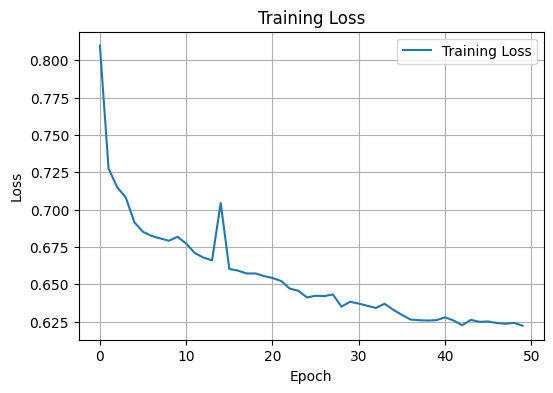

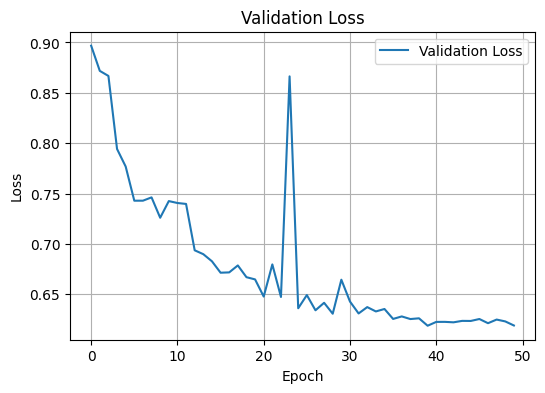

In [84]:
import matplotlib.pyplot as plt

# Plotting training loss curve
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting validation loss curve
plt.figure(figsize=(6, 4))
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


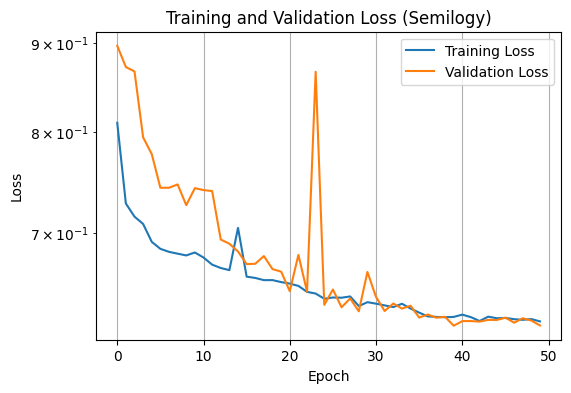

In [85]:
import matplotlib.pyplot as plt

# Plotting train and validation loss curves on a semilogy scale
plt.figure(figsize=(6, 4))
plt.semilogy(train_losses, label='Training Loss')
plt.semilogy(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Semilogy)')
plt.legend()
plt.grid(True)
plt.show()


# Testing

In [19]:
# Define the training, validation, and test data
test_data = {i: torch.tensor(dataset[i], dtype=torch.float32).to(device) for i in range(test_start, test_end)}

# config = {
#         'd_model':92,
#         'd_state':6,
#         'd_conv':3,
#         'headdim':16,

#     }

# t = MambaG2G(config, 92, 64, dropout=dropout).to(device)
config = {
      'd_model':96,
      'd_state':64,
      'd_conv':4,
      'headdim':16,
  }

t = MambaG2G(config, 96, 64, dropout=dropout).to(device)

t.load_state_dict(torch.load('/content/GDGMamba.pth'))
t.eval()  # Set the model to evaluation mode

# Evaluate the model on the test dataset
test_loss_value = 0.0
test_samples = 0
mu_timestamp = []
sigma_timestamp = []

with torch.no_grad():  # Disable gradient calculation for evaluation
    for i in test_data.keys():
        triplet, scale = to_triplets(sample_all_hops(hop_dict[i]), scale_terms_dict[i])
        inputs = test_data[i]
        _, mu, sigma = t(inputs)
        mu_timestamp.append(mu.cpu().detach().numpy())
        sigma_timestamp.append(sigma.cpu().detach().numpy())
        test_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
        test_samples += 1

test_loss_value /= test_samples
print(f"Test Loss: {test_loss_value}")

# save_sigma_mu = True
# sigma_L_arr = []
# mu_L_arr = []
# if save_sigma_mu == True:
#     sigma_L_arr.append(sigma_timestamp)
#     mu_L_arr.append(mu_timestamp)

# import time
# start = time.time()
# MAPS = []
# MRR = []
# for i in tqdm(range(5)):
#     curr_MAP, curr_MRR = get_MAP_avg(mu_L_arr, sigma_L_arr, lookback,data)
#     MAPS.append(curr_MAP)
#     MRR.append(curr_MRR)
# #print mean and std of map and mrr
# print("Mean MAP: ", np.mean(MAPS))
# print("Mean MRR: ", np.mean(MRR))
# print("Std MAP: ", np.std(MAPS))
# print("Std MRR: ", np.std(MRR))


Test Loss: 0.9017721244267055


In [20]:
# Define different percentage splits of the test data
percentage_splits = [0.99]

for percentage in percentage_splits:
    # Calculate the number of data points for this percentage split
    num_data_points = int((test_end - test_start) * percentage)
    # Create a subset of the test data based on the calculated number of data points
    test_data_subset = {i: test_data[i] for i in range(test_start, test_start + num_data_points)}

    # Evaluate the model on the subset of test data
    test_loss_value = 0.0
    test_samples = 0

    mu_timestamp = []
    sigma_timestamp = []
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for i in test_data_subset.keys():
            # Ensure `i` is correctly used to access corresponding `hop_dict` and `scale_terms_dict` entries
            index = i
            triplet, scale = to_triplets(sample_all_hops(hop_dict[index]), scale_terms_dict[index])
            inputs = test_data_subset[i]
            _, mu, sigma = t(inputs)
            test_loss_value += build_loss(triplet, scale, mu, sigma, 64, scale=False).item()
            test_samples += 1

    test_loss_value /= test_samples
    print(f"Test Loss for {percentage * 100}% of test data: {test_loss_value}")


Test Loss for 99.0% of test data: 0.9023052275180816


## Yiran version

In [21]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from imblearn.over_sampling import RandomOverSampler
warnings.filterwarnings("ignore")

def evaluate_once(test_data, binary_temporal_graphs, model, device):
    # Lists to collect embeddings and labels
    embeddings_list = []
    labels_list = []

    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        embeddings_list.append(embeddings_flat)
        ground_truth = np.array(binary_temporal_graphs)[i].astype(int) //reconstuction or prediction?
        labels_list.append(ground_truth.flatten())

    embeddings_array = np.concatenate(embeddings_list, axis=0)
    labels_array = np.concatenate(labels_list, axis=0)
    labels_array = labels_array[:embeddings_array.shape[0]]

    # Train MLP
    # param_grid = {
    #     'hidden_layer_sizes': [(100, 50), (150, 75)],
    #     'activation': ['relu'],
    #     'solver': ['adam'],
    #     'learning_rate': ['constant', 'adaptive'],
    #     'max_iter': [200, 300],
    # }

    ros = RandomOverSampler(random_state=42)
    embeddings_array_balanced, labels_array_balanced = ros.fit_resample(embeddings_array, labels_array)

    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=123)
    mlp_classifier.fit(embeddings_array_balanced, labels_array_balanced)
    # # Initialize GridSearchCV
    # mlp_classifier = MLPClassifier(random_state=123)
    # grid_search = GridSearchCV(mlp_classifier, param_grid, cv=3, scoring='f1', n_jobs=-1)

    # grid_search.fit(embeddings_array, labels_array)
    # # Get the best estimator
    # best_mlp_classifier = grid_search.best_estimator_

    # --- MAP Evaluation ---
    AP_list = []
    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        predictions_flat = mlp_classifier.predict_proba(embeddings_flat)[:, 1]
        ground_truth_flat = np.array(binary_temporal_graphs)[i].astype(int).flatten()
        ground_truth_flat = ground_truth_flat[:predictions_flat.shape[0]]
        precision, recall, _ = precision_recall_curve(ground_truth_flat, predictions_flat)
        AP = auc(recall, precision)
        AP_list.append(AP)
    MAP_value = np.mean(AP_list)

    # --- MRR Evaluation ---
    RR_list = []
    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = model(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        predictions_flat = mlp_classifier.predict_proba(embeddings_flat)[:, 1]
        ground_truth_flat = np.array(binary_temporal_graphs)[i].astype(int).flatten()
        true_indices = np.where(ground_truth_flat == 1)[0]

        if len(true_indices) == 0:
            RR_list.append(0.0)
        else:
            sorted_indices = np.argsort(predictions_flat)[::-1]
            for rank, idx in enumerate(sorted_indices, 1):
                if idx in true_indices:
                    RR_list.append(1.0 / rank)
                    break
            else:
                RR_list.append(0.0)
    MRR_value = np.mean(RR_list)

    return MAP_value, MRR_value

# ==== Run 5 times and collect results ====
# config = {
#         'd_model':92,
#         'd_state':6,
#         'd_conv':3,
#         'headdim':16,

#     }
config = {
      'd_model':96,
      'd_state':64,
      'd_conv':4,
      'headdim':16,
  }
t = MambaG2G(config, 96, 64, dropout=dropout).to(device)
t.load_state_dict(torch.load('/content/GDGMamba.pth'))
t.eval()  # Set the model to evaluation mode

num_runs = 5
MAP_scores = []
MRR_scores = []
import time
start = time.time()
for run in range(num_runs):
    print(f"Run {run+1}...")
    MAP, MRR = evaluate_once(test_data, binary_temporal_graphs, t, device)
    MAP_scores.append(MAP)
    MRR_scores.append(MRR)

# ==== Final report ====
MAP_scores = np.array(MAP_scores)
MRR_scores = np.array(MRR_scores)

print(f"\n==== Final Results over {num_runs} runs ====")
print(f"MAP: Mean = {MAP_scores.mean():.4f}, Variance = {MAP_scores.var():.6f}")
print(f"MRR: Mean = {MRR_scores.mean():.4f}, Variance = {MRR_scores.var():.6f}")
print("Time taken: ", time.time() - start)




Run 1...
Run 2...
Run 3...
Run 4...
Run 5...

==== Final Results over 5 runs ====
MAP: Mean = 0.5853, Variance = 0.000003
MRR: Mean = 0.6289, Variance = 0.001172
Time taken:  55.50455617904663


## rupsa version

In [28]:
def pad_graphs_to_96x96(graph_list) -> np.ndarray:
    padded_graphs = []
    for mat in graph_list:
        padded = np.zeros((96, 96), dtype=mat.dtype)
        h, w = mat.shape
        padded[:h, :w] = mat
        padded_graphs.append(padded)
    return np.stack(padded_graphs)

padded_graphs = pad_graphs_to_96x96(np.array(binary_temporal_graphs))
print(padded_graphs.shape)  # → (T, 96, 96)

(111, 96, 96)


In [64]:
padded_graphs = np.array(binary_temporal_graphs)

In [66]:
import numpy as np
import torch
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load the saved model
# config = {
#         'd_model':96,
#         'd_state':64,
#         'd_conv':4,
#         'headdim':16,

#     }

# t = MambaG2G(config, 96, 64, dropout=dropout).to(device)
config = {
        'd_model':92,
        'd_state':6,
        'd_conv':3,
        'headdim':16,

    }

t = MambaG2G(config, 92, 64, dropout=dropout).to(device)


t.load_state_dict(torch.load('/content/GDGMamba.pth'))
t.eval()  # Set the model to evaluation mode

# Define a list to store MAP and MRR values for each test split ratio
MAP_values = []
MRR_values = []

test_split_ratios = [0.99]

# Extract features from dynfc_matrices
# features = dynfc_matrices.reshape(dynfc_matrices.shape[0], -1)

# # Initialize ground truth
# ground_truth = dynfc_matrices.astype(int)
# ground_truth_adjusted = ground_truth.reshape(-1, 1)

# # Use only the first 1200 samples for training
# X_train = features[:1200]
# y_train = ground_truth_adjusted[:1200].ravel()
embeddings_list = []
labels_list = []

from typing import List
import numpy as np


for i in train_data.keys():
    inputs = train_data[i]
    with torch.no_grad():
        _, embeddings, _ = t(inputs.to(device))
    embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
    embeddings_list.append(embeddings_flat)
    ground_truth = padded_graphs[i].astype(int)
    labels_list.append(ground_truth.flatten())

embeddings_array = np.concatenate(embeddings_list, axis=0)
labels_array = np.concatenate(labels_list, axis=0)
labels_array = labels_array[:embeddings_array.shape[0]]

# Balance positive and negative samples in the training set
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(embeddings_array, labels_array)

# Iterate over each test split ratio
for test_split_ratio in test_split_ratios:
    # num_data_points = int((3401 - 2401) * test_split_ratio)
    # test_data_subset = {i: test_data[i] for i in range(2401, 2401 + num_data_points)}

    # Initialize MLP classifier
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=123)

    # Split the features and ground truth into test sets
    # X_test = features[2401:2401 + num_data_points]
    # y_test = ground_truth_adjusted[2401:2401 + num_data_points].ravel()
    embeddings_list = []
    labels_list = []

    for i in test_data.keys():
        inputs = test_data[i]
        with torch.no_grad():
            _, embeddings, _ = t(inputs.to(device))
        embeddings_flat = embeddings.cpu().numpy().reshape(-1, embeddings.shape[-1])
        embeddings_list.append(embeddings_flat)
        ground_truth = padded_graphs[i].astype(int)
        labels_list.append(ground_truth.flatten())

    embeddings_array = np.concatenate(embeddings_list, axis=0)
    labels_array = np.concatenate(labels_list, axis=0)
    labels_array = labels_array[:embeddings_array.shape[0]]

    # Fit MLP classifier
    mlp_classifier.fit(X_train_balanced, y_train_balanced)

    # Predict probabilities for the positive class
    y_proba = mlp_classifier.predict_proba(embeddings_array)[:, 1]

    # Compute precision-recall curve and area under the curve
    precision, recall, _ = precision_recall_curve(labels_array, y_proba)
    MAP_value = auc(recall, precision)
    MAP_values.append(MAP_value)

    # Initialize list to store reciprocal ranks
    RR_list_gnn = []

    # Evaluate MRR using GNN predictions
    for i in test_data.keys():
        inputs = test_data[i]

        # Forward pass through the GNN model
        with torch.no_grad():
            _, mu_pred, sigma_pred = t(inputs.to(device))

        # Extract predictions from the GNN model
        predictions_gnn = mu_pred.cpu().numpy()

        # Compute reciprocal rank for each sample using GNN predictions
        RR_sample_list_gnn = []
        for j in range(predictions_gnn.shape[0]):
            true_indices = np.where(ground_truth[j].flatten() == 1)[0]
            sorted_indices = np.argsort(predictions_gnn[j].flatten())[::-1]

            for idx in sorted_indices:
                if idx in true_indices:
                    RR = 1 / (sorted_indices.tolist().index(idx) + 1)
                    RR_sample_list_gnn.append(RR)
                    break

        # Append reciprocal ranks for the current sample
        RR_list_gnn.extend(RR_sample_list_gnn)

    # Compute MRR for the current test split ratio
    MRR_value_gnn = np.mean(RR_list_gnn)
    MRR_values.append(MRR_value_gnn)

# Print MAP and MRR values for all test split ratios
for i, test_split_ratio in enumerate(test_split_ratios):
    print(f"Test Split Ratio: {test_split_ratio}, MAP: {MAP_values[i]}, MRR: {MRR_values[i]}")

Test Split Ratio: 0.99, MAP: 0.6917745193157376, MRR: 0.7765234644582472
